## Relevant Packages

In [ ]:
#Relevant packages
%matplotlib inline
%load_ext autoreload
%autoreload

!pip install yfinance
!pip install fix_yahoo_finance

import re
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
from scipy import stats
import statistics as st
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt
from tabulate import tabulate

from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, PowerTransformer
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, r2_score, matthews_corrcoef, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold,cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score,precision_recall_curve, average_precision_score, mean_squared_error
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from mpl_toolkits import mplot3d
from scipy.stats import multivariate_normal
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.varmax import VARMAX

import bs4 as bs
import datetime as dt
import os
import pickle
import requests
import fix_yahoo_finance as yfin
import yfinance as yfin
from datetime import datetime
import warnings
import time
import requests
import io
import scipy as sp
from scipy import stats
from scipy.stats import norm
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

     |████████████████████████████████| 63 kB 828 kB/s 
     |████████████████████████████████| 6.4 MB 10.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1) Data Importing

### 1.1) and 1.2) Import 11 Select Spdrs (e.g. XLF, XLE, etc.).  Some of this period did not include the Real Estate sector fund.  Select a US equity fund. Import your equity ETF prices for 2014 - 2019.

In [ ]:
# 11 SPDRs
sectors = ['IVE','XLE', 'XLF', 'XLB','XLK', 'XLP', 'XLV', 'XTL', 'XLI', 'XLY', 'XLU', 'XME']
start= datetime(2014, 1, 1)
end= datetime(2019, 12, 31)

#Download Data
yfin.pdr_override()
df = pdr.get_data_yahoo(sectors, start=start, end=end)['Adj Close']

# Converting the index as date
df.index = pd.to_datetime(df.index)

print("Dataframe Shape:")
print(df.shape)
df

#df.reset_index(inplace=True)
#df

[*********************100%***********************]  12 of 12 completed
Dataframe Shape:
(1509, 12)


,IVE,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XME,XTL
Date,,,,,,,,,,,,
2014-01-02,70.206161,39.093040,63.771690,15.149470,44.161087,31.462751,34.340992,28.593901,48.416767,60.089664,37.429760,49.448792
2014-01-03,70.280739,38.999268,63.537804,15.253995,44.281055,31.311615,34.276279,28.502127,48.530949,59.927071,37.078709,49.718571
2014-01-06,70.173004,38.786098,63.625492,15.267933,44.023956,31.258270,34.146843,28.548014,48.328957,59.556694,36.797874,49.637646
2014-01-07,70.504478,38.717888,64.107925,15.274901,44.298199,31.542765,34.332909,28.800385,48.838326,59.918037,36.525810,50.033291
2014-01-08,70.396774,38.948093,63.662067,15.323681,44.221073,31.542765,34.074036,28.647425,49.268654,59.755428,36.262547,50.536861
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,123.998581,58.668903,53.912754,29.318371,79.413483,89.396164,59.607018,59.914787,99.230057,122.139992,28.202576,68.186615
2019-12-24,123.912750,58.736176,53.886658,29.385420,79.094322,89.425552,59.682911,59.999058,99.104958,122.415215,28.485964,68.274498
2019-12-26,124.237015,58.995640,53.869259,29.548244,79.278084,90.092041,59.739838,60.102047,99.037582,123.909286,28.622780,68.333092


In [ ]:
#Create a monthly dataframe
df_month=df.resample('MS').first()

# Converting the index as date
df_month.index = pd.to_datetime(df_month.index)

print("Dataframe Shape:")
print(df_month.shape)
df_month

Dataframe Shape:
(72, 12)


,IVE,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XME,XTL
Date,,,,,,,,,,,,
2014-01-01,70.206161,39.093040,63.771690,15.149470,44.161087,31.462751,34.340992,28.593901,48.416767,60.089664,37.429760,49.448792
2014-02-01,66.510223,36.671574,59.854034,14.306286,41.684357,30.307011,32.261932,29.664541,48.179653,55.256844,33.875454,48.405689
2014-03-01,70.056992,40.047993,63.654747,15.003133,44.315342,31.969503,34.074036,30.628115,51.815521,59.809639,36.280067,50.357021
2014-04-01,72.690170,40.695885,65.804062,15.653249,45.360535,32.839184,34.954498,31.746971,51.871403,59.463181,36.848225,52.153828
2014-05-01,73.165131,40.550369,68.697983,15.387467,45.532684,32.580242,35.938328,33.458874,51.333839,58.076733,36.883396,49.405575
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,110.240868,55.164474,52.301949,26.177563,73.051727,78.262001,55.397984,55.463253,87.102249,116.278000,26.373037,68.162033
2019-09-01,108.185928,53.481300,48.819702,25.257885,71.539192,76.508972,57.128586,58.717659,85.966476,116.287766,24.424149,64.349861
2019-10-01,111.622681,54.314072,49.808815,26.120426,72.919205,77.939186,57.645363,60.007915,85.537636,117.261368,24.530235,63.794853


### 1.3) Import the data series corresponding to the Leading Economic Indicators (LEI), Coincidental Economic Indicators (CEI), and Lagging Economic Indicators (LAG).

The first 10 columns correspond to LEI, the next 4 columns to CEI and the last 7 columnms to LAG. All the data is presented on a monthly basis and the series Total Unit Labor Cost: Manufacturing for the United States (LCULMN01USQ661S), we applied a linear interpolation for the missing months between quarters. That was the only series that did not have monthly data.

In [ ]:
# !pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# CSV file in Drive link. DO NOT EDIT THE LINK
link = 'https://drive.google.com/file/d/1F30i9LXwQdkkfhngqiv5j_oVk4fo6dof/view?usp=sharing'

start = link.find("/d/") + len("/d/")
end = link.find("/view?")
id = link[start:end]

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('LIC10_CEI4_LEI7_Month.csv')  
df_LEI_CEI_LAC = pd.read_csv('LIC10_CEI4_LEI7_Month.csv',index_col=0,parse_dates = True)

# Converting the index as date
df_LEI_CEI_LAC.index = pd.to_datetime(df_LEI_CEI_LAC.index)

#Delete first row to match the size of the log-returns dataframe
df_LEI_CEI_LAC = df_LEI_CEI_LAC.iloc[1:]

print("Dataframe Shape:")
print(df_LEI_CEI_LAC.shape)
df_LEI_CEI_LAC

Dataframe Shape:
(71, 21)


,CEU3000000002,IC4WSA,NEWORDER,ISM_MAN_NEWORDERS,DGORDER,PERMIT1,SP500,USSLIND,T10YFF,UMCSENT,PAYEMS,W875RX1,INDPRO,CMRMTSPL,MNFCTRIRSA,UEMPMEAN,TOTALSL_DSPI,BUSLOANS,DPRIME,LCULMN01USQ661S,CUSR0000SASLE
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-01,40.5,333250.0,67386,54.5,230482,609,1817.034737,1.41,2.642105,81.6,137714,11870.9,100.7918,1339979,1.29,36.5,0.242806,1619.9242,3.250000,95.047219,290.590
2014-03-01,41.0,325350.0,68683,55.1,235368,623,1863.523333,1.49,2.644286,80.0,137968,11933.0,101.7782,1350652,1.30,35.3,0.242418,1634.1492,3.250000,95.047219,291.366
2014-04-01,40.8,319000.0,66486,55.1,235724,620,1864.263333,1.79,2.615238,84.1,138293,11965.2,101.8337,1352609,1.30,34.9,0.242839,1650.9200,3.250000,94.703428,292.062
2014-05-01,41.0,320150.0,65819,56.9,229731,627,1889.767143,1.85,2.471905,81.9,138511,11993.1,102.2325,1356343,1.31,34.4,0.242915,1663.5430,3.250000,95.043953,292.806
2014-06-01,41.2,313625.0,69618,58.9,239998,649,1947.087619,1.95,2.502857,82.5,138837,12042.7,102.5722,1355815,1.31,33.9,0.243011,1676.7829,3.250000,95.043953,293.271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,40.5,215150.0,65593,47.2,245614,895,2897.498182,1.32,-0.498636,89.8,151081,13912.9,102.6882,1493174,1.48,21.9,0.253834,2363.1229,5.250000,113.148252,338.528
2019-09-01,40.7,213125.0,65187,47.3,245317,894,2982.156000,1.50,-0.353000,93.2,151244,13933.7,102.3143,1491257,1.49,22.3,0.253981,2368.4184,5.150000,113.148252,339.445
2019-10-01,40.5,214437.5,65642,48.9,250673,924,2977.675217,1.41,-0.123182,95.5,151337,13947.5,101.4645,1482087,1.50,22.4,0.253956,2365.1365,4.988636,114.380208,340.342


In [ ]:
#Normalization of the Dataframe
normalized_df_LEI_CEI_LAC=(df_LEI_CEI_LAC-df_LEI_CEI_LAC.mean())/df_LEI_CEI_LAC.std()
normalized_df_LEI_CEI_LAC

,CEU3000000002,IC4WSA,NEWORDER,ISM_MAN_NEWORDERS,DGORDER,PERMIT1,SP500,USSLIND,T10YFF,UMCSENT,PAYEMS,W875RX1,INDPRO,CMRMTSPL,MNFCTRIRSA,UEMPMEAN,TOTALSL_DSPI,BUSLOANS,DPRIME,LCULMN01USQ661S,CUSR0000SASLE
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-01,-1.096996,2.400941,1.267077,-0.446621,-0.127309,-1.873477,-1.464292,-0.543211,1.599932,-2.241472,-1.866136,-1.916923,-0.258940,-1.944472,-2.108508,2.382294,-1.899943,-1.999485,-0.985455,-1.596592,-1.620308
2014-03-01,0.757450,2.159771,1.744440,-0.341214,0.220923,-1.713628,-1.341759,-0.206740,1.602658,-2.542633,-1.804072,-1.815766,0.293402,-1.709360,-1.903152,2.096700,-2.006497,-1.932630,-0.985455,-1.596592,-1.569198
2014-04-01,0.015671,1.965919,0.935831,-0.341214,0.246296,-1.747881,-1.339809,1.055027,1.566337,-1.770909,-1.724659,-1.763314,0.324480,-1.666250,-1.903152,2.001502,-1.890785,-1.853811,-0.985455,-1.658169,-1.523356
2014-05-01,0.757450,2.001026,0.690340,-0.024991,-0.180833,-1.667957,-1.272587,1.307380,1.387110,-2.185005,-1.671392,-1.717866,0.547791,-1.583995,-1.697797,1.882505,-1.869901,-1.794485,-0.985455,-1.597177,-1.474354
2014-06-01,1.499228,1.801832,2.088568,0.326368,0.550909,-1.416766,-1.121504,1.727969,1.425814,-2.072069,-1.591735,-1.637071,0.738009,-1.595626,-1.697797,1.763507,-1.843700,-1.732260,-0.985455,-1.597177,-1.443727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,-1.096996,-1.204400,0.607161,-1.729080,0.951169,1.392001,1.383545,-0.921741,-2.327302,-0.698024,1.400043,1.409377,0.802964,1.430207,1.793244,-1.092429,1.128756,1.493401,1.442965,1.645524,1.537084
2019-09-01,-0.355218,-1.266219,0.457732,-1.711512,0.930001,1.380583,1.606683,-0.164681,-2.145196,-0.058058,1.439872,1.443259,0.593596,1.387978,1.998599,-0.997231,1.169173,1.518289,1.321544,1.645524,1.597481
2019-10-01,-1.096996,-1.226151,0.625195,-1.430425,1.311730,1.723116,1.594872,-0.543211,-1.857828,0.374860,1.462596,1.465738,0.117743,1.185975,2.203955,-0.973432,1.162374,1.502865,1.125614,1.866183,1.656561


## 2)	Data Processing



### 2.1) Compute the daily returns of your Equity ETF and SPDRs

In [ ]:
#Daily Log Returns
returns = df.pct_change() # simple linear returns
df_log_rets = np.log(1+returns).dropna()

print("Dataframe Shape:")
print(df_log_rets.shape)
df_log_rets

Dataframe Shape:
(1508, 12)


,IVE,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XME,XTL
Date,,,,,,,,,,,,
2014-01-03,0.001062,-0.002402,-0.003674,0.006876,0.002713,-0.004815,-0.001886,-0.003215,0.002356,-0.002710,-0.009423,0.005441
2014-01-06,-0.001534,-0.005481,0.001379,0.000913,-0.005823,-0.001705,-0.003783,0.001609,-0.004171,-0.006200,-0.007603,-0.001629
2014-01-07,0.004713,-0.001760,0.007554,0.000456,0.006210,0.009060,0.005434,0.008801,0.010484,0.006049,-0.007421,0.007939
2014-01-08,-0.001529,0.005928,-0.006979,0.003188,-0.001743,0.000000,-0.007569,-0.005325,0.008773,-0.002718,-0.007234,0.010014
2014-01-09,0.001412,-0.003948,-0.003105,0.003632,0.004833,-0.006504,0.005209,0.005856,0.007459,-0.000151,-0.016840,-0.019041
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.000616,0.002789,0.010215,-0.002284,0.008193,0.002855,-0.004288,-0.009333,0.003984,-0.002331,0.012553,0.000530
2019-12-24,-0.000692,0.001146,-0.000484,0.002284,-0.004027,0.000329,0.001272,0.001406,-0.001261,0.002251,0.009998,0.001288
2019-12-26,0.002613,0.004408,-0.000323,0.005526,0.002321,0.007425,0.000953,0.001715,-0.000680,0.012131,0.004791,0.000858


In [ ]:
#Monthly Log Returns
returns = df_month.pct_change() # simple linear returns
df_month_log_rets = np.log(1+returns).dropna()

print("Dataframe Shape:")
print(df_month_log_rets.shape)
df_month_log_rets

Dataframe Shape:
(71, 12)


,IVE,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XME,XTL
Date,,,,,,,,,,,,
2014-02-01,-0.054080,-0.063943,-0.063401,-0.057267,-0.057718,-0.037425,-0.062452,0.036759,-0.004909,-0.083846,-0.099775,-0.021320
2014-03-01,0.051953,0.088077,0.061565,0.047560,0.061205,0.053403,0.054648,0.031966,0.072753,0.079175,0.068578,0.039521
2014-04-01,0.036897,0.016048,0.033208,0.042419,0.023312,0.026840,0.025511,0.035879,0.001078,-0.005810,0.015539,0.035060
2014-05-01,0.006513,-0.003582,0.043038,-0.017125,0.003788,-0.007916,0.027757,0.052520,-0.010417,-0.023592,0.000954,-0.054134
2014-06-01,0.014359,0.039529,0.017593,0.015784,0.025752,0.034212,0.016381,-0.015328,0.027431,0.027850,-0.070118,0.009620
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,-0.004266,-0.016074,-0.039829,-0.011523,-0.015345,0.013531,0.013601,0.011368,-0.019962,-0.009777,-0.035750,0.023530
2019-09-01,-0.018816,-0.030987,-0.068900,-0.035764,-0.020922,-0.022654,0.030761,0.057020,-0.013125,0.000084,-0.076770,-0.057553
2019-10-01,0.031273,0.015451,0.020058,0.033579,0.019107,0.018521,0.009005,0.021736,-0.005001,0.008337,0.004334,-0.008662


Exploratory Analysis

In [ ]:
#Log Returns
df_month_log_rets.describe()

,IVE,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XME,XTL
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,0.007501,0.005264,-0.003225,0.008925,0.007950,0.013980,0.007496,0.010009,0.009483,0.009621,-0.004559,0.004161
std,0.036542,0.044088,0.057814,0.046517,0.044288,0.044846,0.032592,0.038213,0.039208,0.041013,0.092070,0.043507
min,-0.102816,-0.093370,-0.135317,-0.115906,-0.119113,-0.108675,-0.100186,-0.089844,-0.108807,-0.093892,-0.190616,-0.117694
25%,-0.009026,-0.017415,-0.041907,-0.020015,-0.017772,-0.011607,-0.006697,-0.011090,-0.010431,-0.013362,-0.074396,-0.021870
50%,0.009858,0.007342,-0.000949,0.015784,0.010806,0.019144,0.009005,0.011368,0.016093,0.013961,-0.012671,0.009283
75%,0.029271,0.032886,0.032507,0.036457,0.035322,0.043165,0.030682,0.035498,0.033581,0.033932,0.051737,0.029452
max,0.084709,0.120943,0.126946,0.152551,0.104619,0.119058,0.061434,0.085545,0.085341,0.092443,0.208682,0.105284


In [ ]:
#Economica Data
df_LEI_CEI_LAC.describe()

,CEU3000000002,IC4WSA,NEWORDER,ISM_MAN_NEWORDERS,DGORDER,PERMIT1,SP500,USSLIND,T10YFF,UMCSENT,PAYEMS,W875RX1,INDPRO,CMRMTSPL,MNFCTRIRSA,UEMPMEAN,TOTALSL_DSPI,BUSLOANS,DPRIME,LCULMN01USQ661S,CUSR0000SASLE
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,7.100000e+01,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,40.795775,254602.464789,63943.338028,57.042254,232268.253521,773.084507,2372.583927,1.539155,1.362586,93.508451,145351.253521,13047.690141,101.254228,1.428249e+06,1.392676,26.490141,0.249724,2045.364503,4.061602,103.961138,315.190789
std,0.269622,32756.956296,2717.011125,5.692192,14030.895428,87.582899,379.397938,0.237762,0.799734,5.312781,4092.549302,613.895354,1.785849,4.539542e+04,0.048696,4.201774,0.003641,212.774984,0.823581,5.583092,15.182782
min,40.100000,211250.000000,59244.000000,46.800000,212753.000000,609.000000,1817.034737,0.990000,-0.498636,80.000000,137714.000000,11870.900000,98.195400,1.339979e+06,1.290000,19.500000,0.242418,1619.924200,3.250000,94.703428,290.590000
25%,40.600000,222531.250000,61543.500000,51.950000,222270.500000,708.500000,2054.172954,1.400000,1.050022,90.850000,142063.500000,12613.250000,99.727000,1.391779e+06,1.370000,22.950000,0.247308,1896.491150,3.250000,100.030554,301.803500
50%,40.800000,250812.500000,64088.000000,56.900000,230367.000000,796.000000,2275.116000,1.550000,1.391579,95.000000,145628.000000,12957.600000,101.464500,1.425497e+06,1.390000,25.900000,0.250963,2072.824800,3.750000,103.520708,315.557000
75%,41.000000,275393.750000,65821.000000,61.800000,239921.000000,841.500000,2714.192393,1.700000,1.983550,97.950000,149017.000000,13599.300000,102.668650,1.474482e+06,1.420000,28.750000,0.252282,2195.305650,4.750000,107.601417,328.108500
max,41.500000,333250.000000,69618.000000,67.400000,304221.000000,940.000000,3176.749524,2.040000,2.644286,101.400000,151789.000000,14024.000000,104.165900,1.493174e+06,1.510000,36.500000,0.254933,2368.418400,5.500000,115.214729,341.889000


In [ ]:
#Normalized Economic Data
normalized_df_LEI_CEI_LAC.describe()

,CEU3000000002,IC4WSA,NEWORDER,ISM_MAN_NEWORDERS,DGORDER,PERMIT1,SP500,USSLIND,T10YFF,UMCSENT,PAYEMS,W875RX1,INDPRO,CMRMTSPL,MNFCTRIRSA,UEMPMEAN,TOTALSL_DSPI,BUSLOANS,DPRIME,LCULMN01USQ661S,CUSR0000SASLE
count,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01
mean,-1.304121e-14,4.737994e-16,9.929459e-16,1.282229e-15,5.113281e-16,-3.752867e-16,-1.113350e-15,1.311549e-15,2.501911e-16,5.153937e-15,1.666898e-15,-2.924109e-15,-8.291880e-15,1.397943e-15,6.773924e-15,3.627771e-16,-1.651261e-15,8.600319e-16,1.132115e-15,2.927236e-15,-3.440128e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.580553e+00,-1.323458e+00,-1.729598e+00,-1.799351e+00,-1.390877e+00,-1.873477e+00,-1.464292e+00,-2.309685e+00,-2.327302e+00,-2.542633e+00,-1.866136e+00,-1.916923e+00,-1.712815e+00,-1.944472e+00,-2.108508e+00,-1.663617e+00,-2.006497e+00,-1.999485e+00,-9.854553e-01,-1.658169e+00,-1.620308e+00
25%,-7.261071e-01,-9.790658e-01,-8.832640e-01,-8.946033e-01,-7.125528e-01,-7.374100e-01,-8.392533e-01,-5.852702e-01,-3.908349e-01,-5.003878e-01,-8.033510e-01,-7.076778e-01,-8.551834e-01,-8.033880e-01,-4.656650e-01,-8.425349e-01,-6.634258e-01,-6.996751e-01,-9.854553e-01,-7.040155e-01,-8.817415e-01
50%,1.567138e-02,-1.156995e-01,5.324305e-02,-2.499099e-02,-1.355048e-01,2.616435e-01,-2.569016e-01,4.561316e-02,3.625370e-02,2.807474e-01,6.762203e-02,-1.467516e-01,1.177434e-01,-6.062595e-02,-5.495425e-02,-1.404504e-01,3.403542e-01,1.290579e-01,-3.783503e-01,-7.888634e-02,2.412017e-02
75%,7.574498e-01,6.347136e-01,6.910763e-01,8.358374e-01,5.454211e-01,7.811513e-01,9.003962e-01,6.764965e-01,7.764636e-01,8.360121e-01,8.957122e-01,8.985405e-01,7.920166e-01,1.018459e+00,5.611118e-01,5.378346e-01,7.024974e-01,7.046935e-01,8.358597e-01,6.520185e-01,8.508132e-01
max,2.611896e+00,2.400941e+00,2.088568e+00,1.819641e+00,5.128165e+00,1.905800e+00,2.119583e+00,2.106499e+00,1.602658e+00,1.485390e+00,1.573041e+00,1.590352e+00,1.630414e+00,1.430207e+00,2.409310e+00,2.382294e+00,1.430651e+00,1.518289e+00,1.746517e+00,2.015656e+00,1.758453e+00


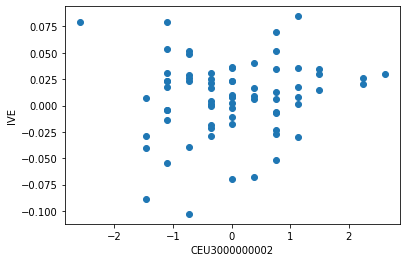

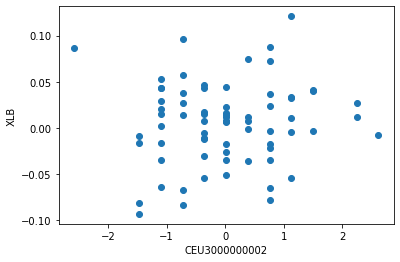

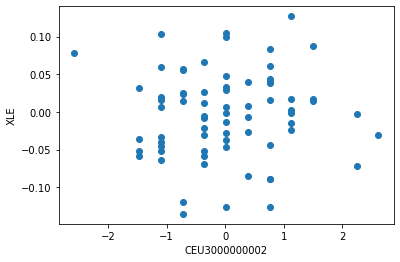

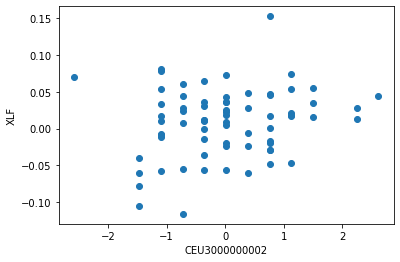

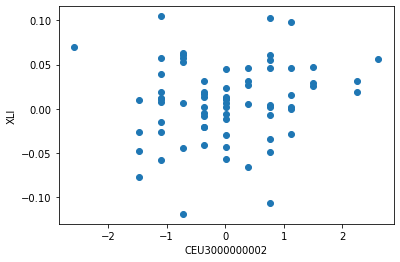

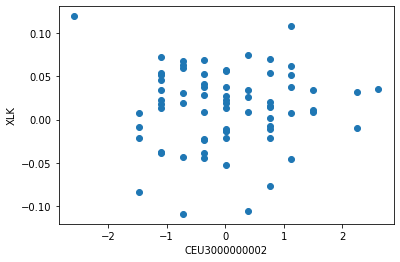

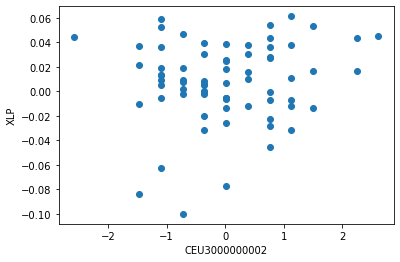

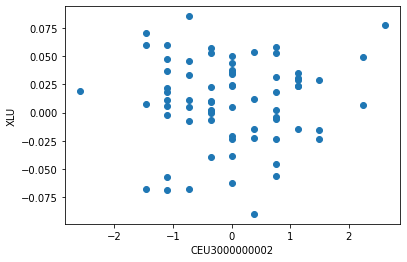

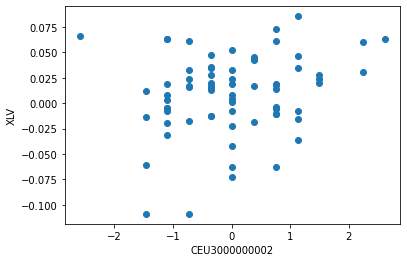

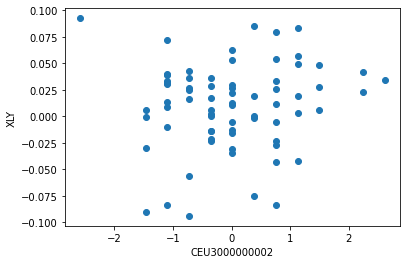

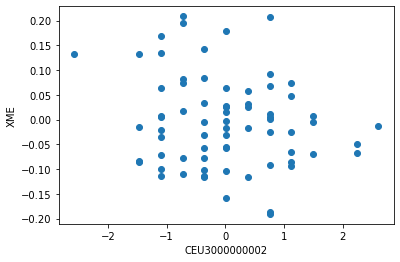

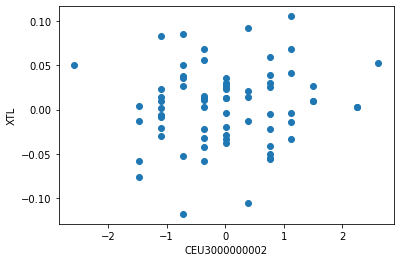

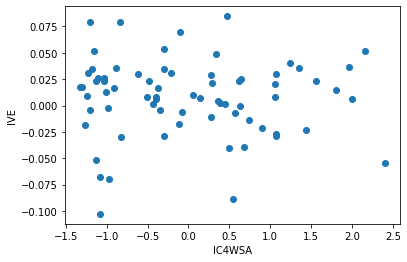

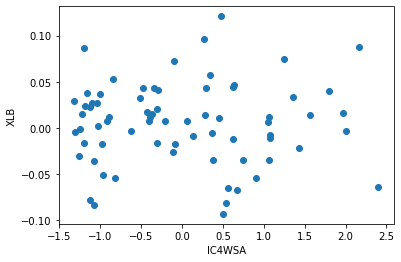

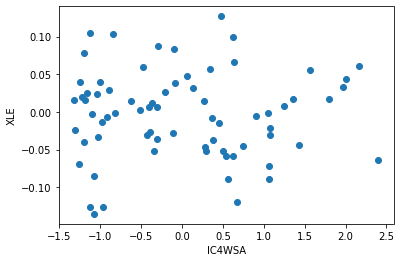

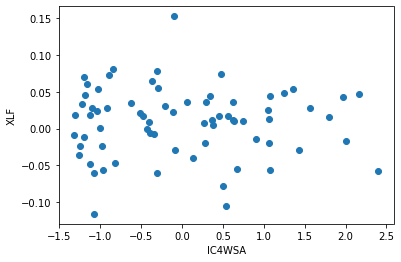

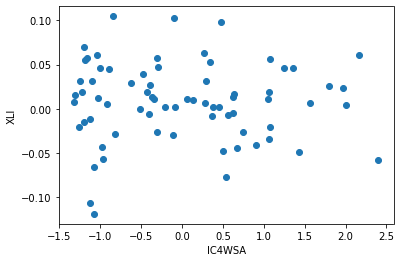

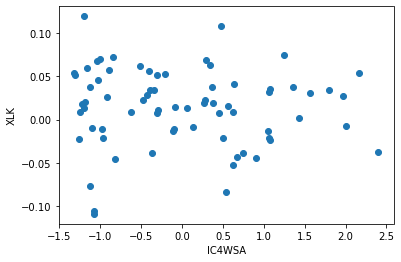

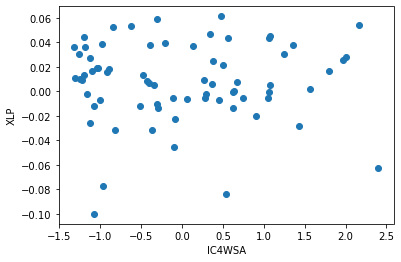

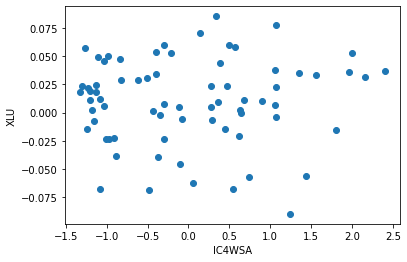

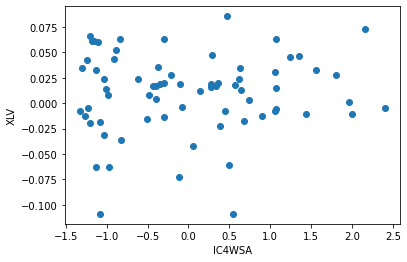

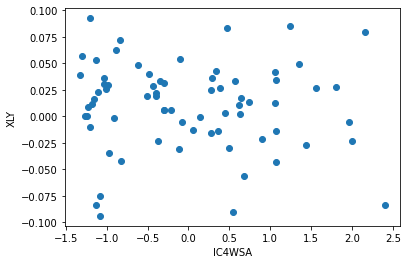

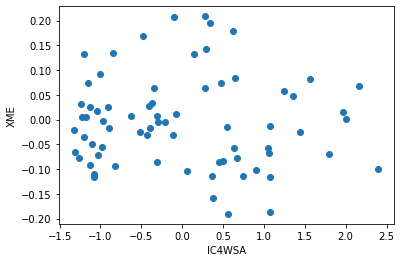

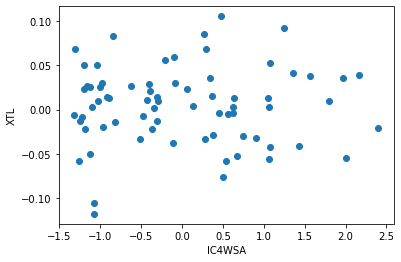

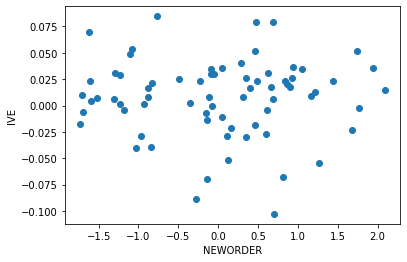

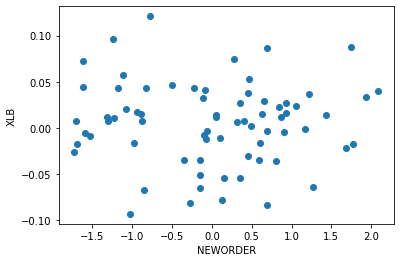

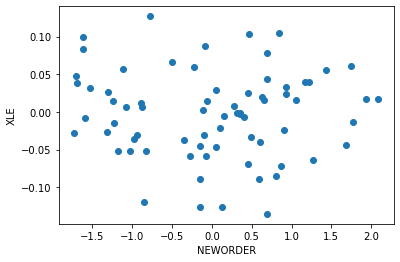

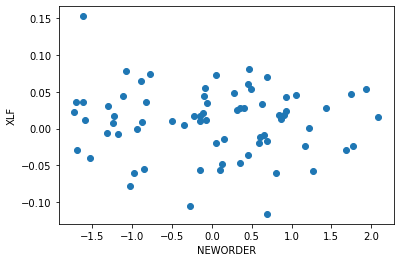

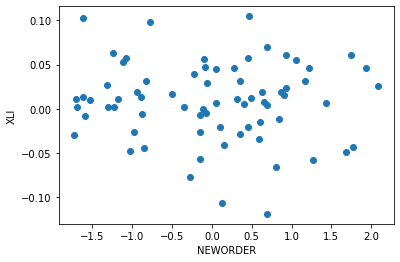

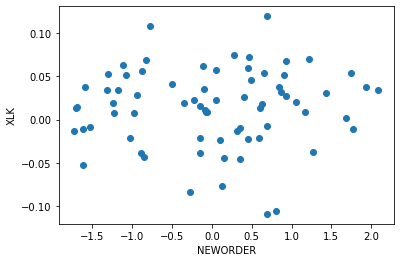

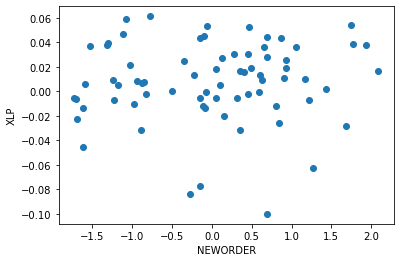

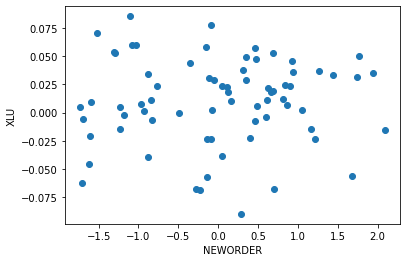

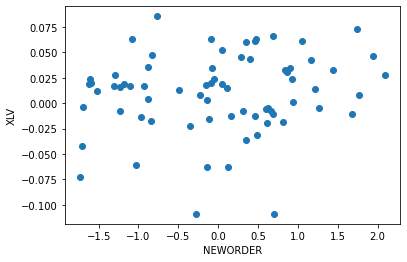

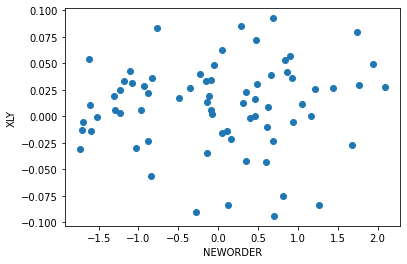

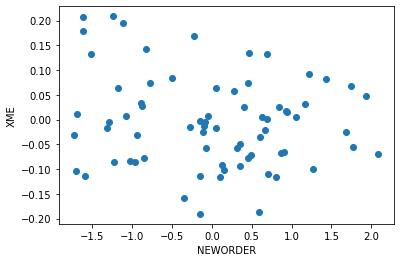

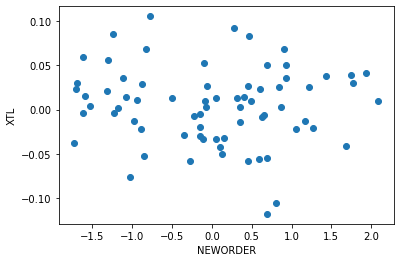

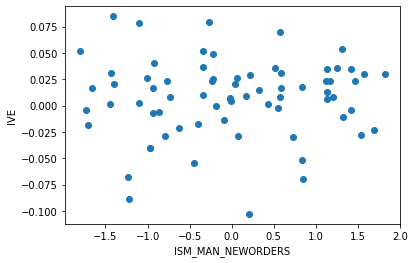

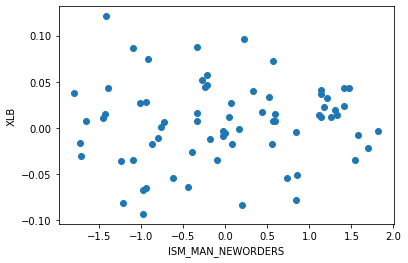

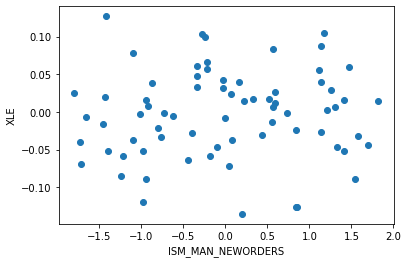

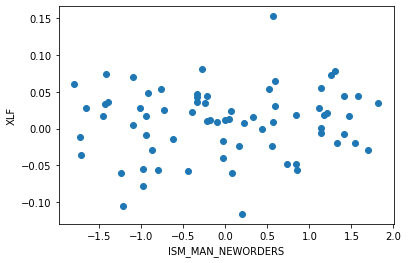

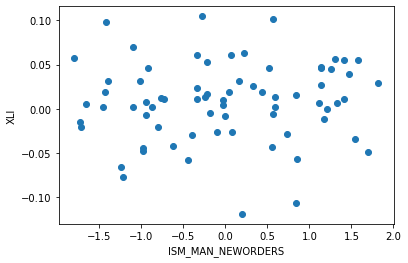

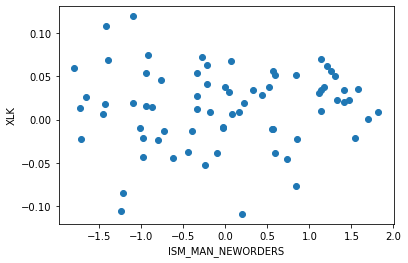

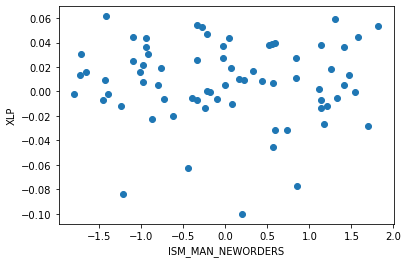

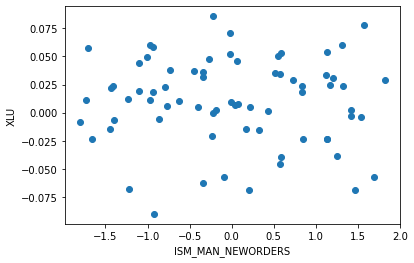

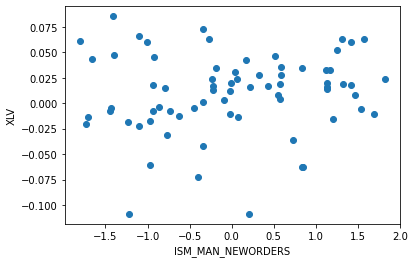

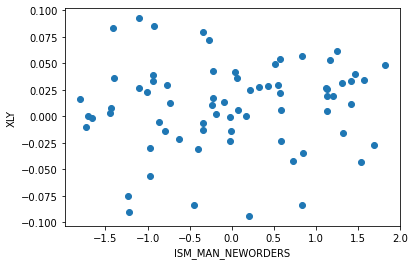

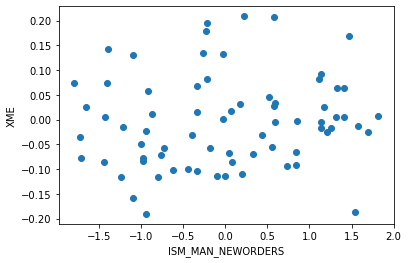

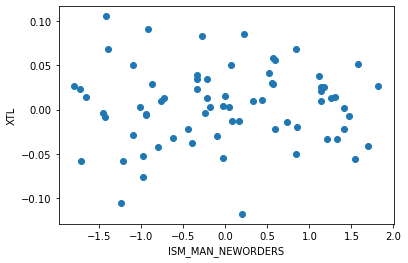

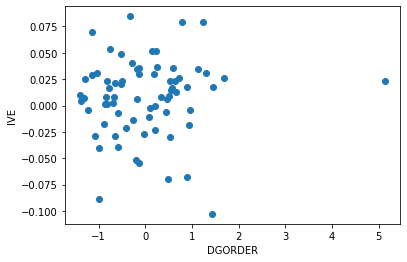

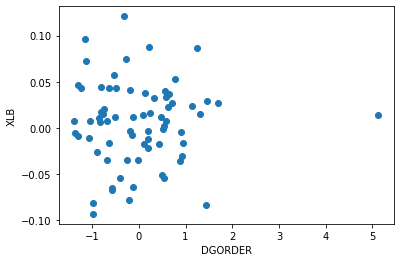

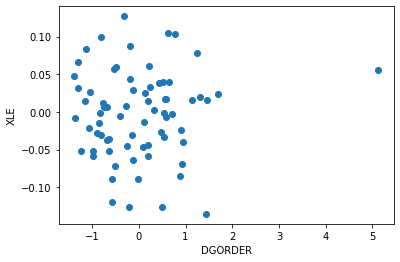

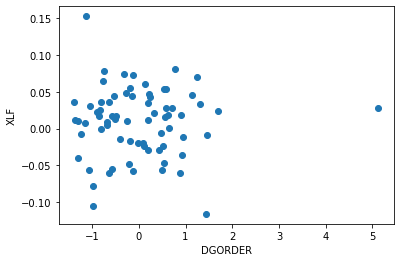

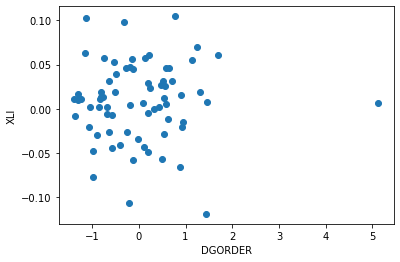

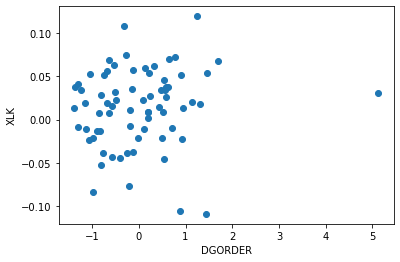

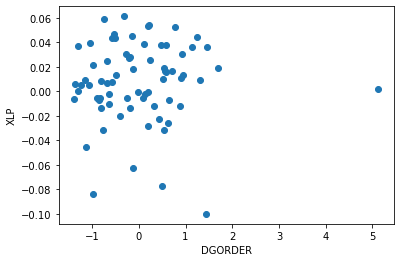

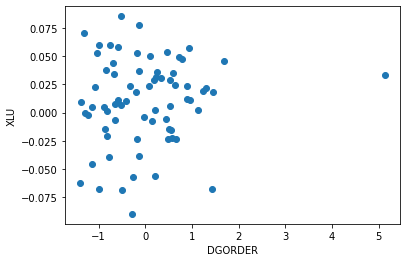

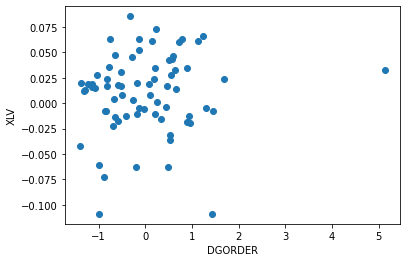

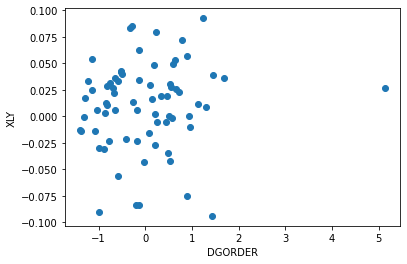

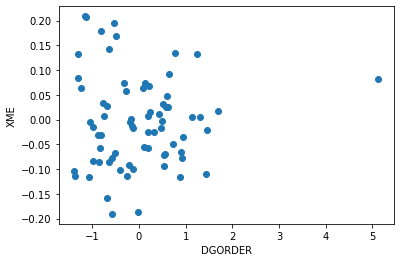

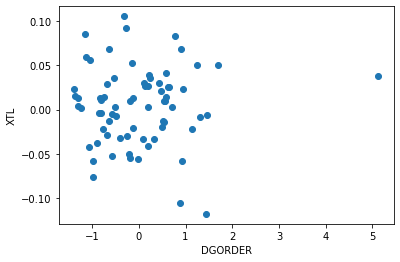

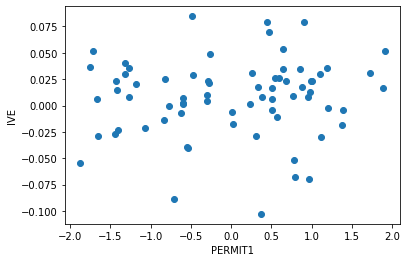

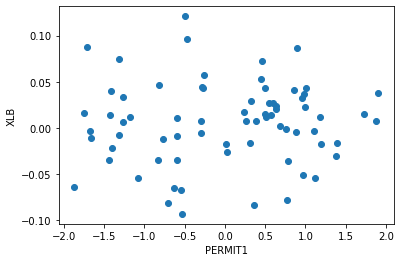

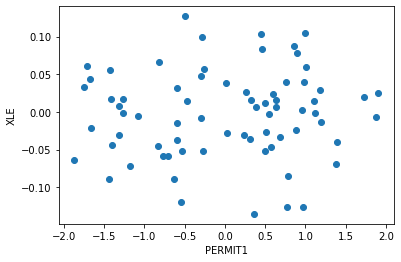

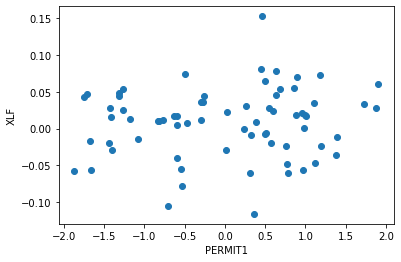

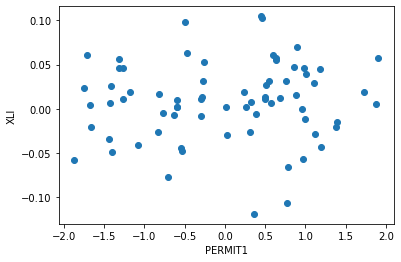

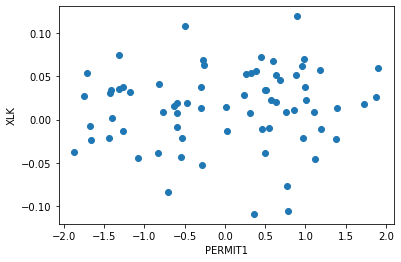

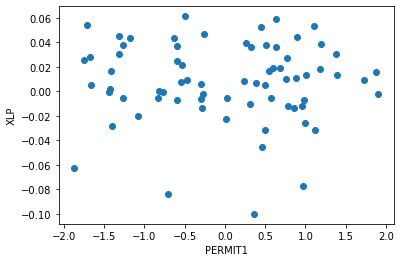

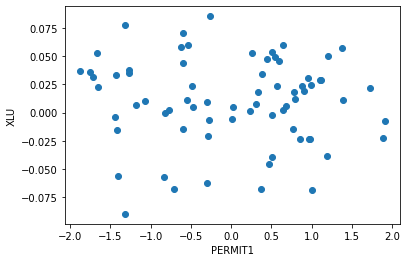

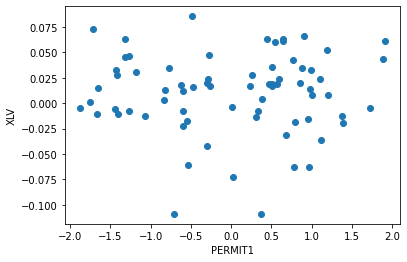

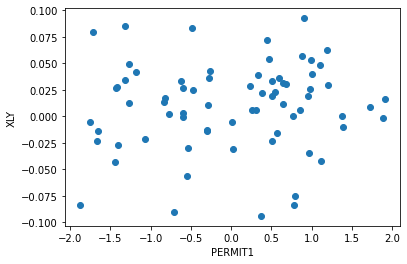

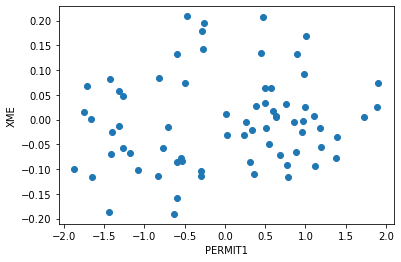

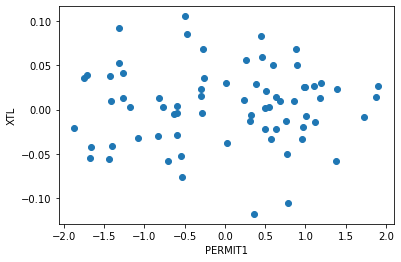

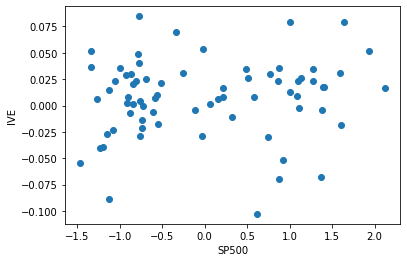

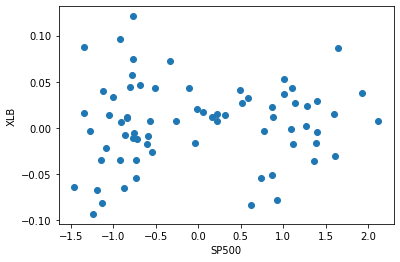

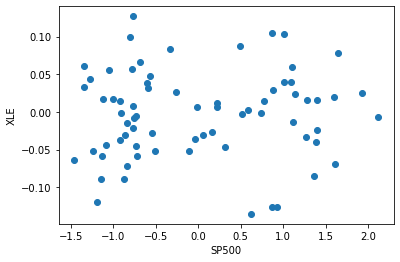

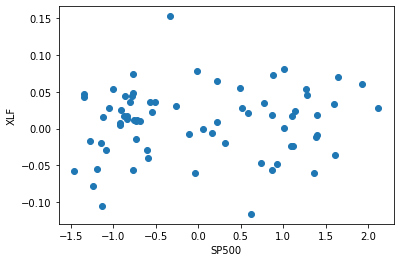

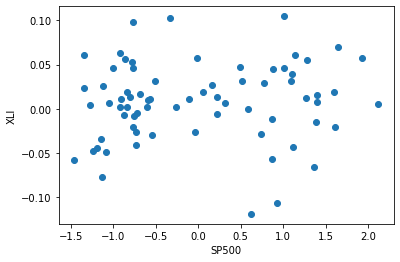

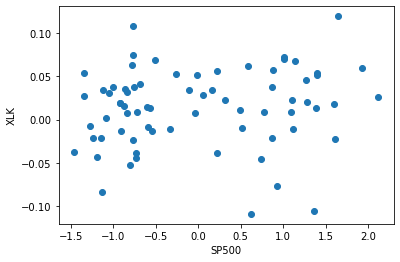

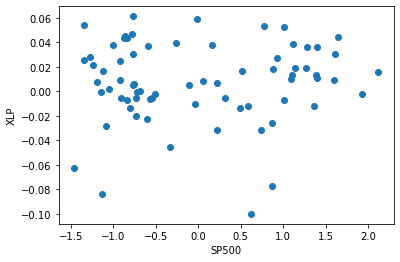

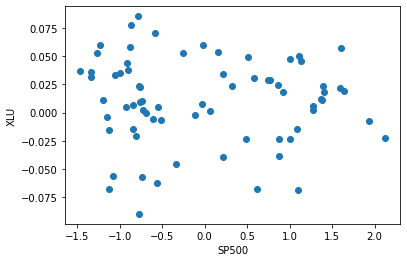

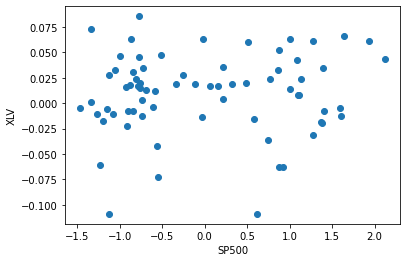

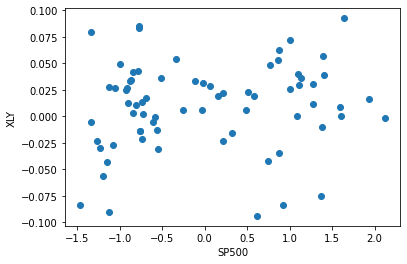

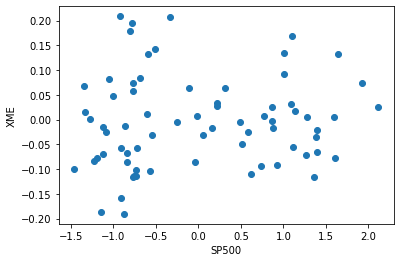

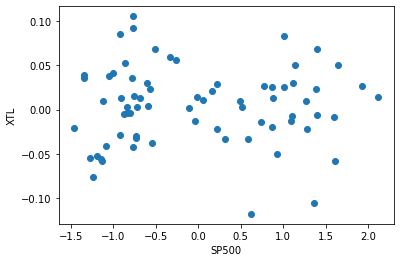

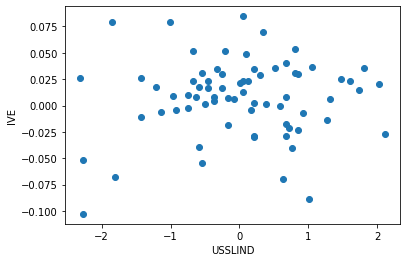

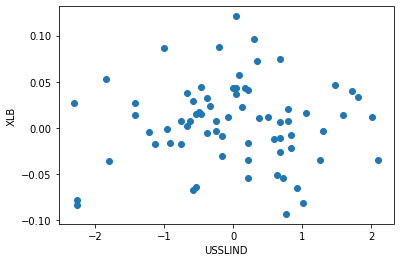

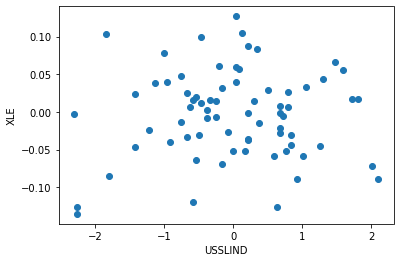

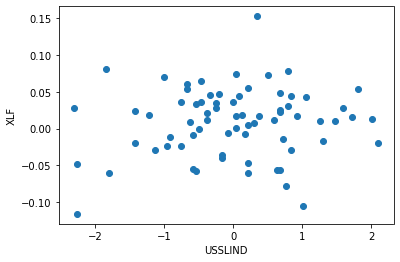

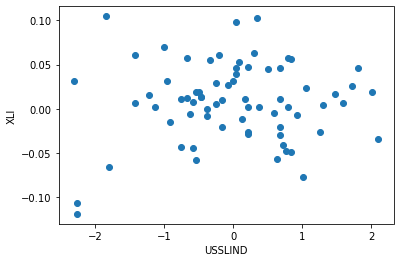

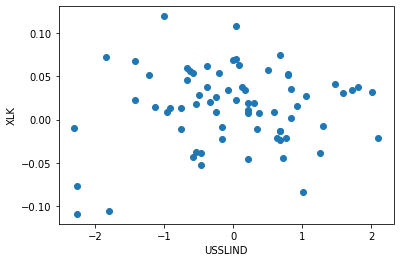

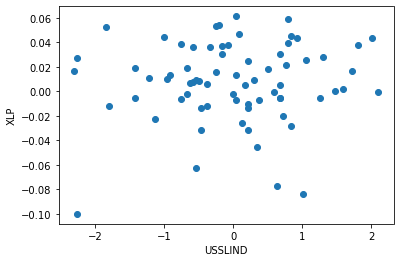

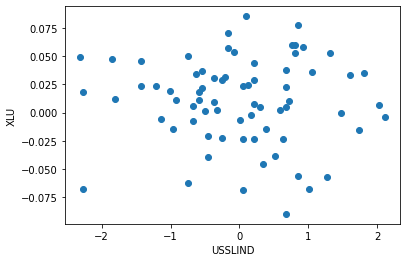

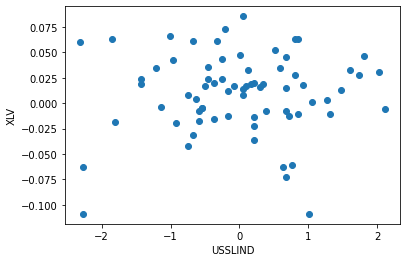

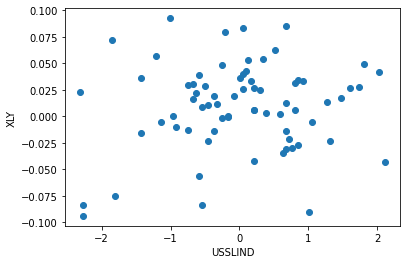

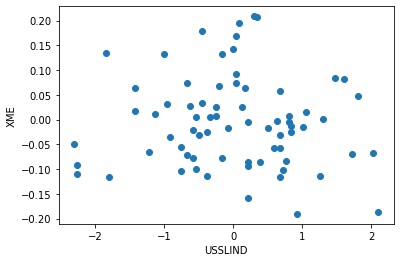

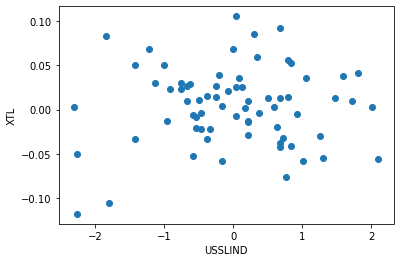

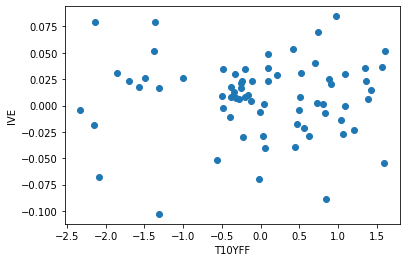

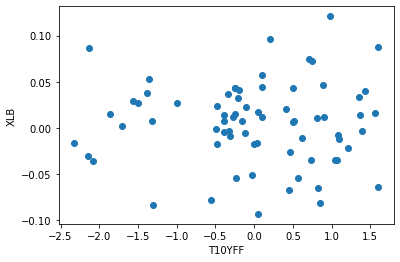

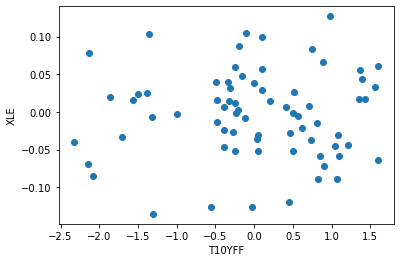

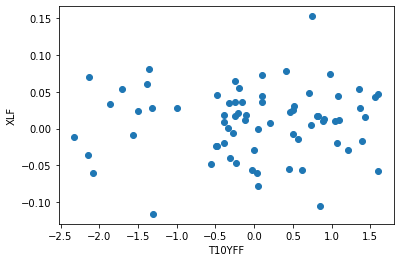

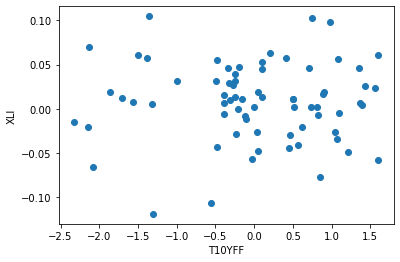

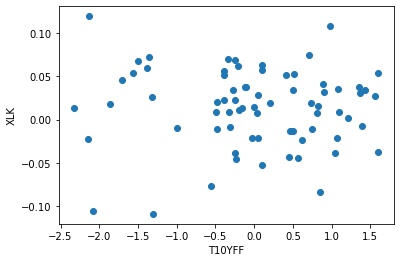

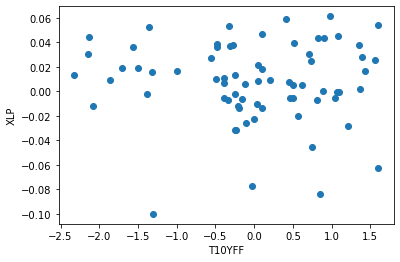

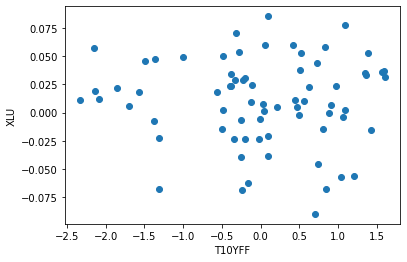

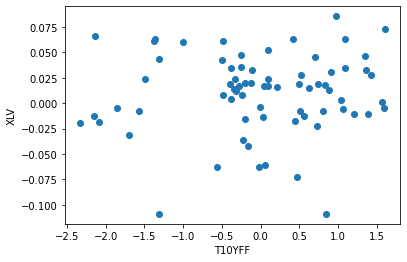

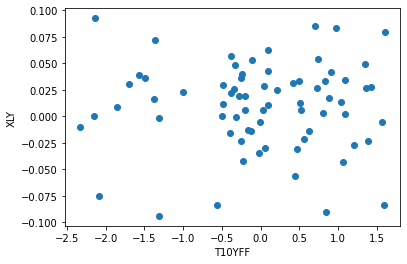

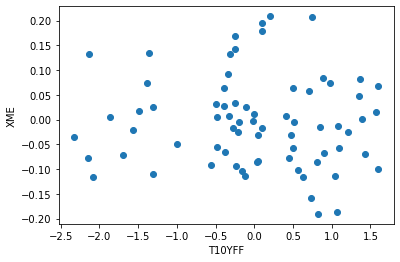

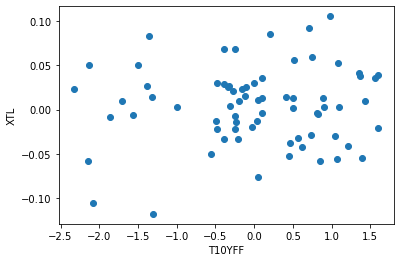

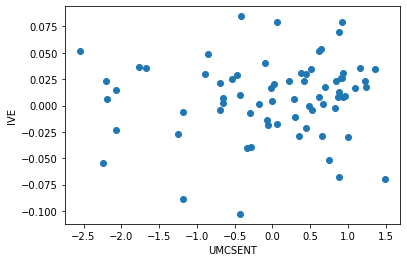

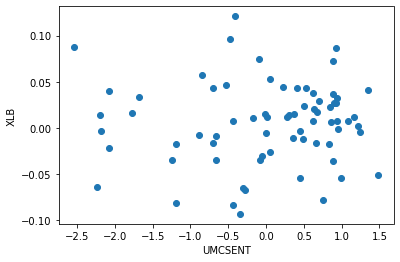

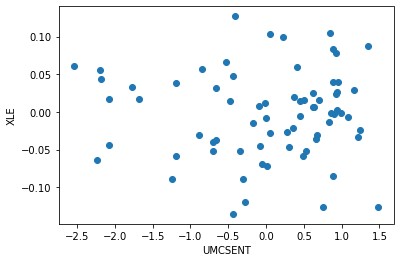

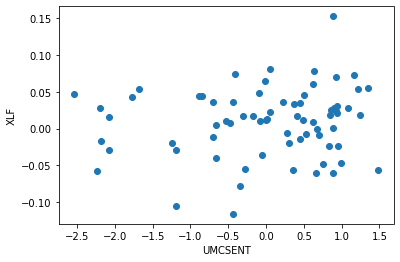

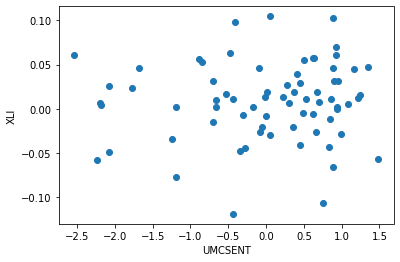

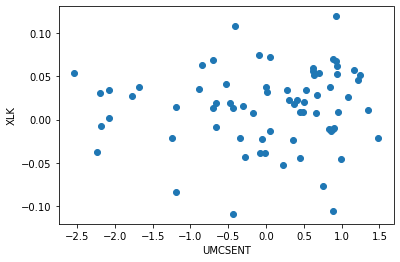

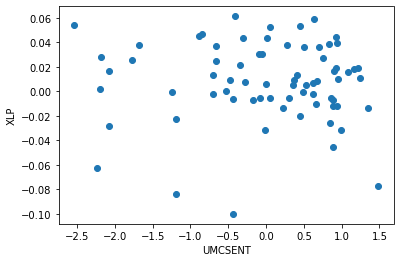

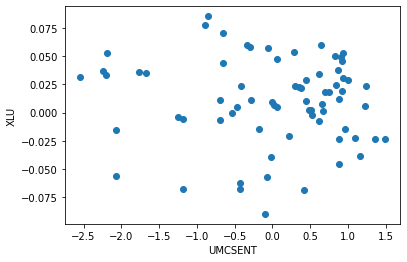

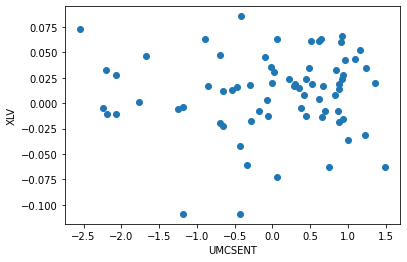

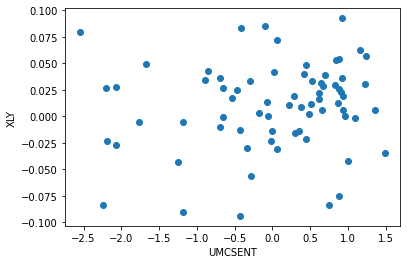

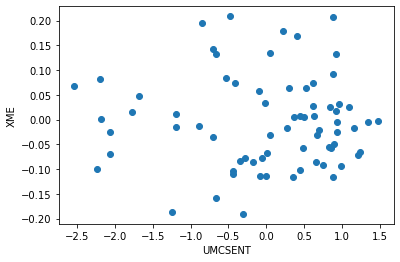

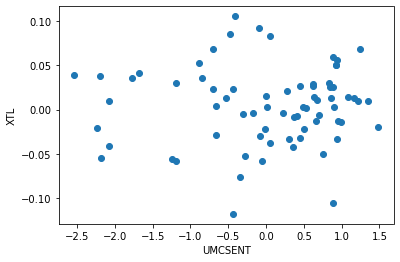

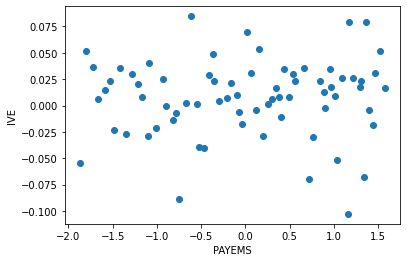

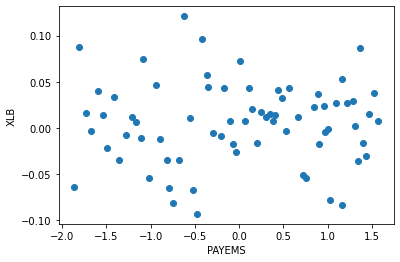

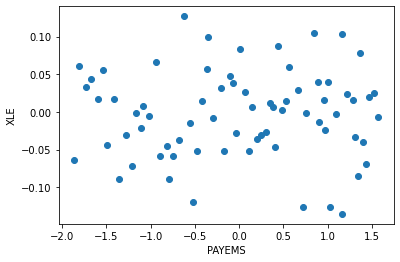

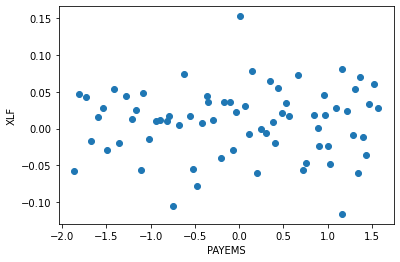

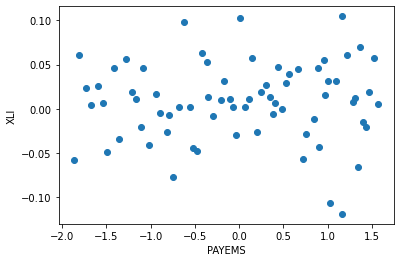

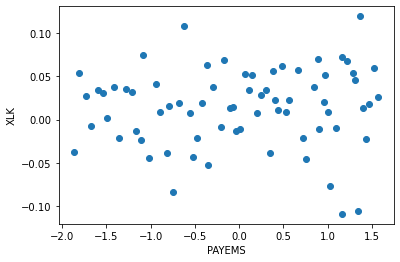

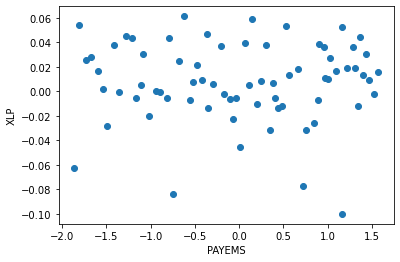

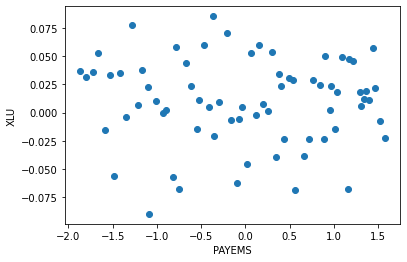

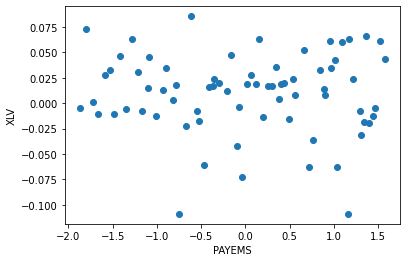

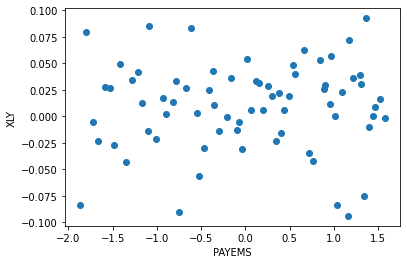

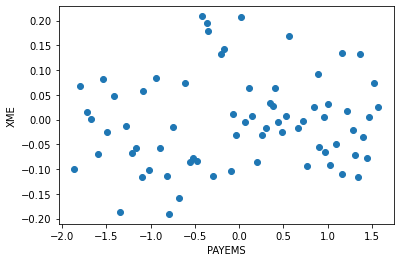

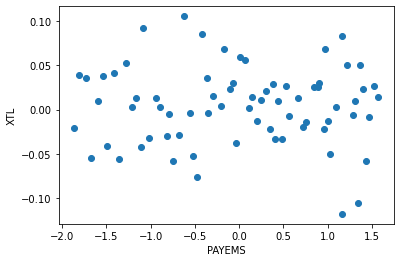

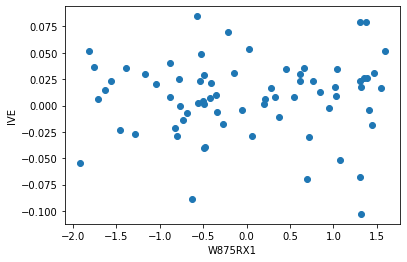

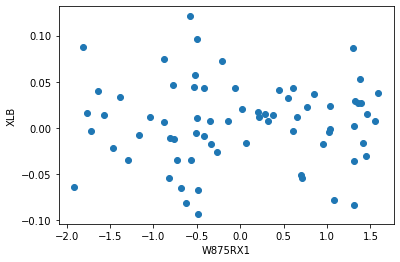

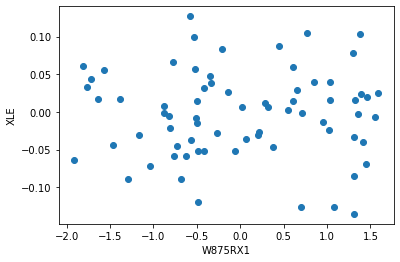

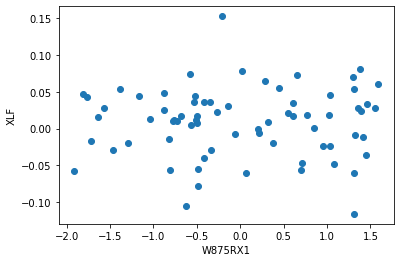

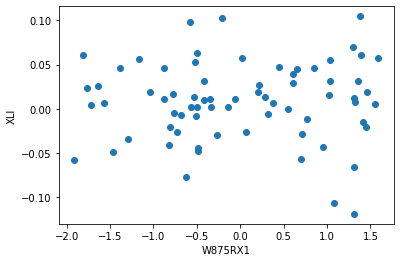

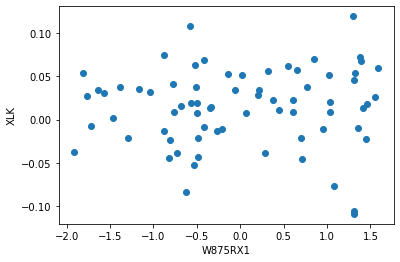

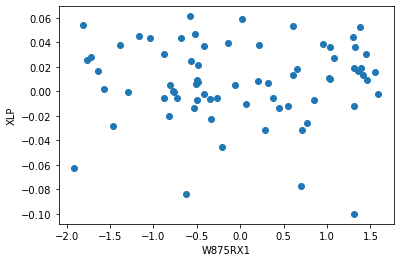

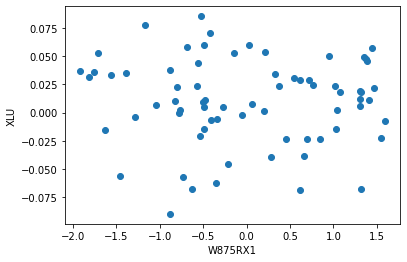

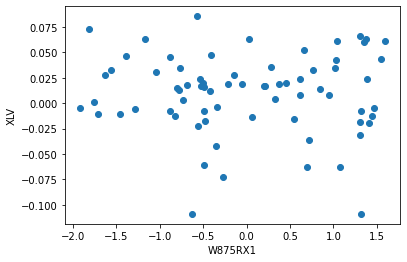

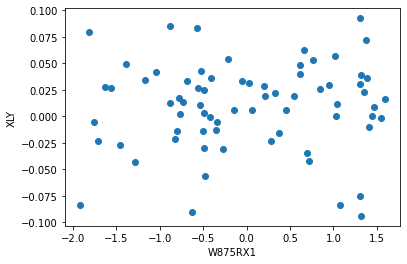

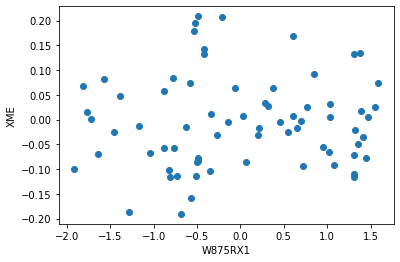

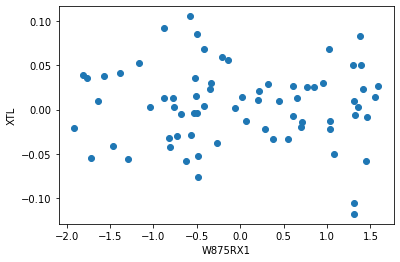

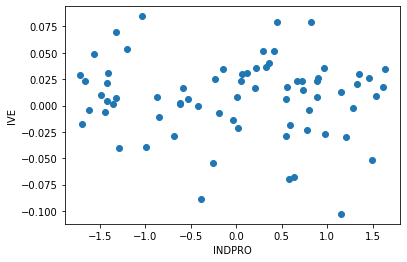

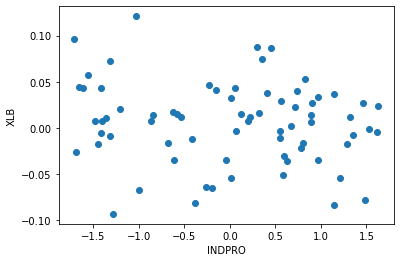

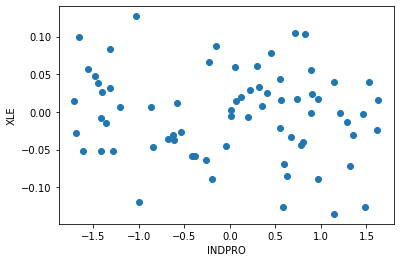

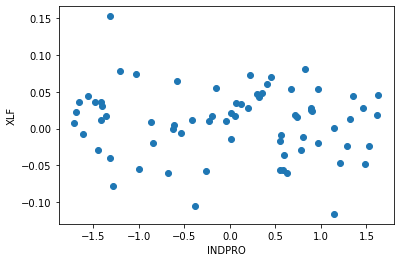

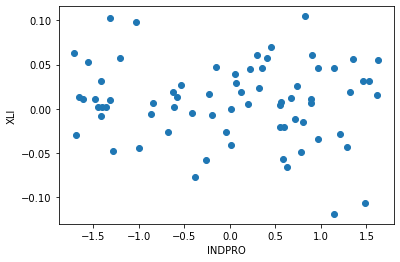

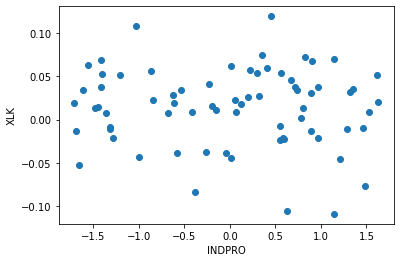

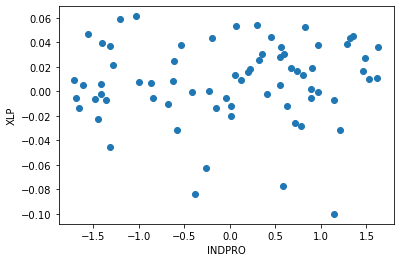

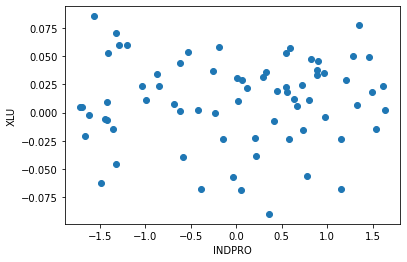

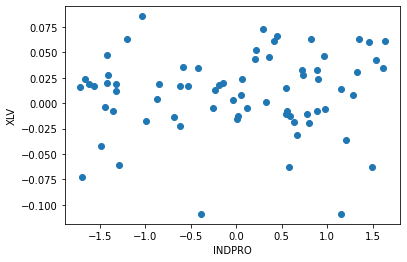

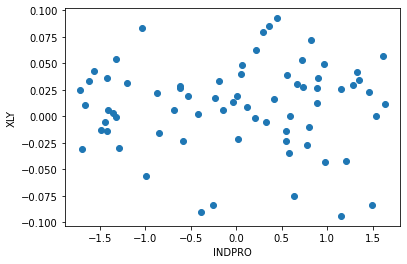

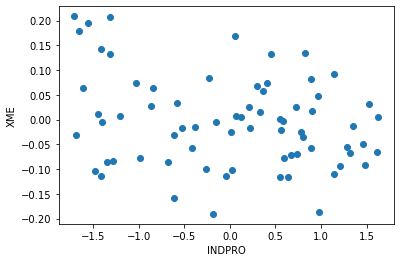

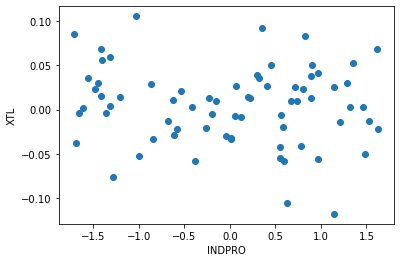

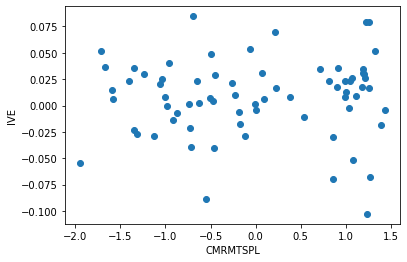

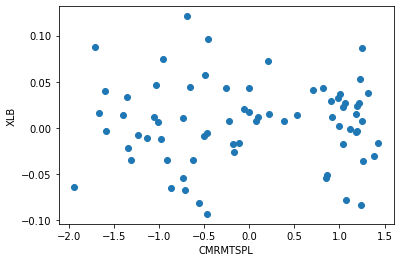

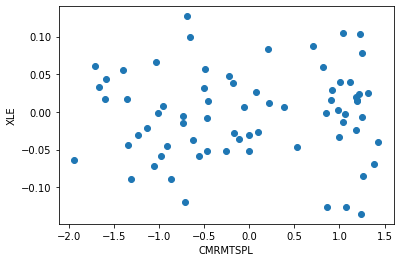

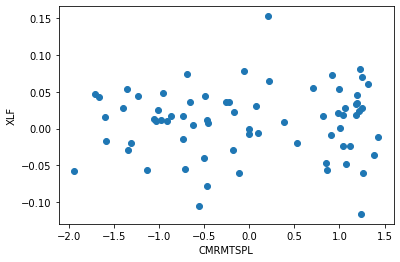

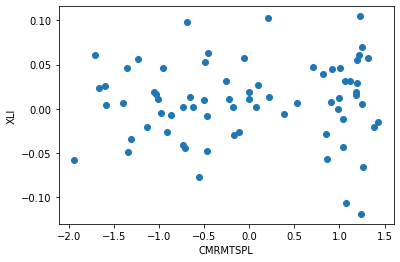

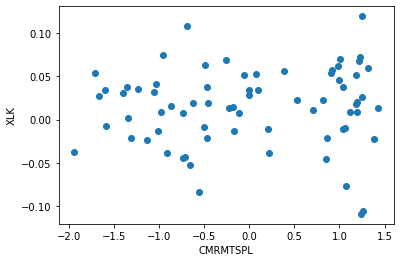

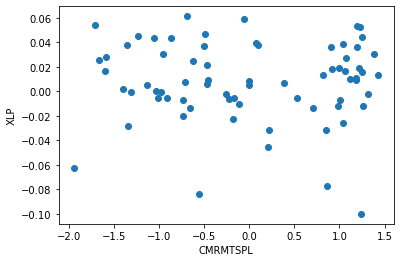

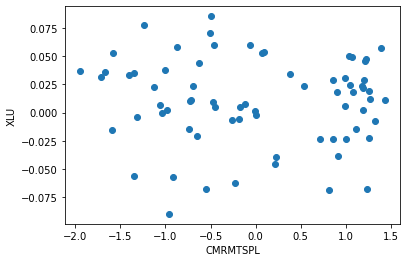

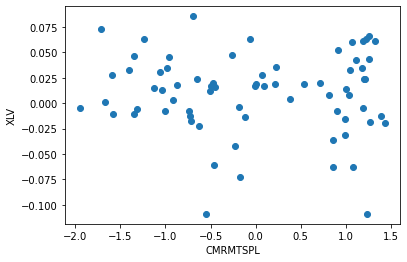

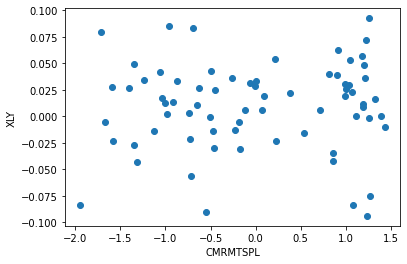

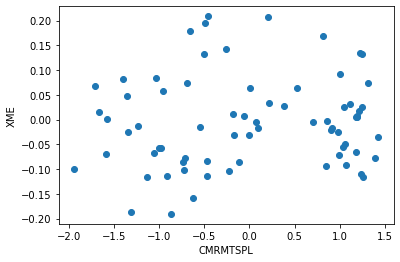

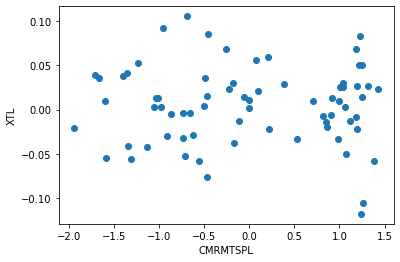

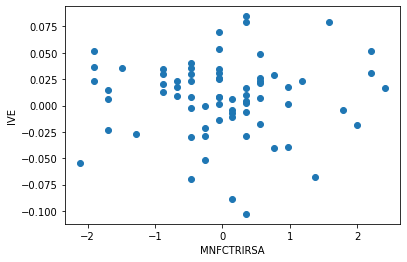

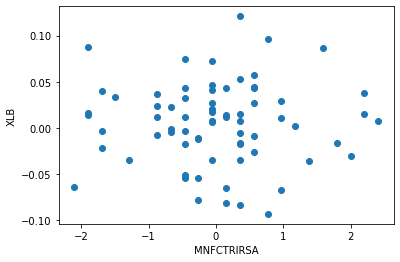

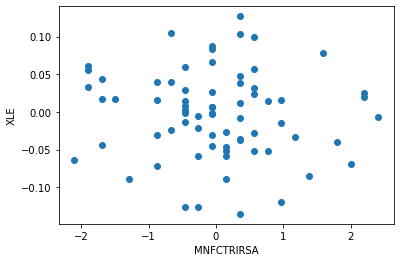

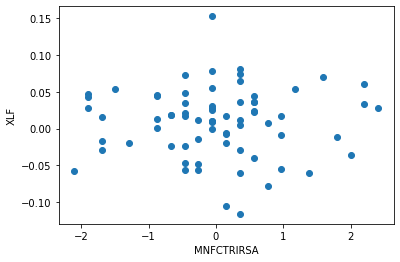

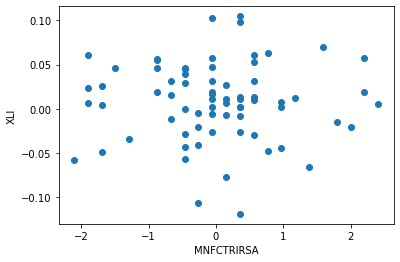

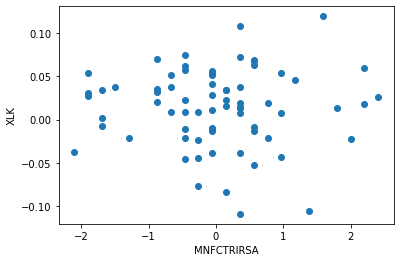

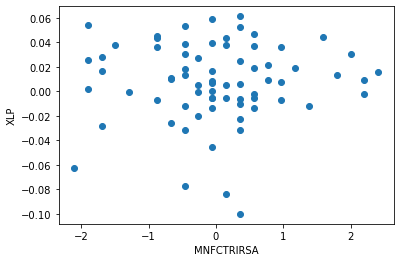

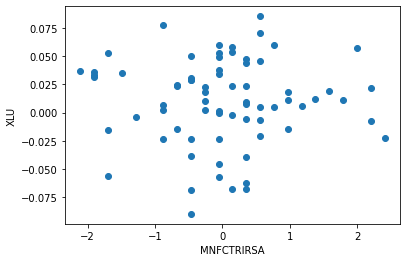

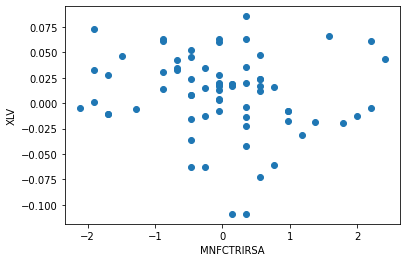

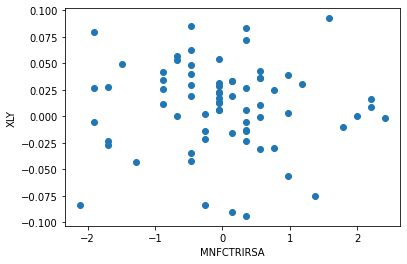

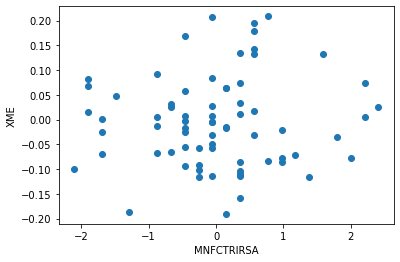

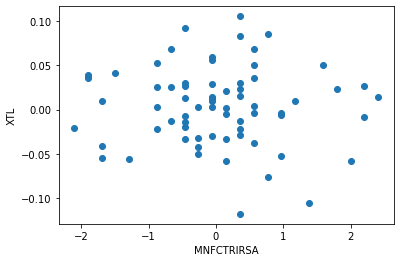

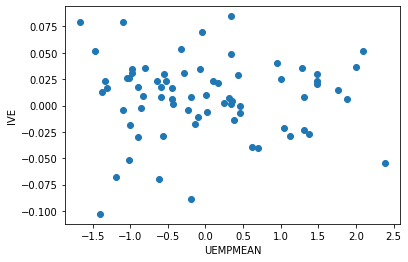

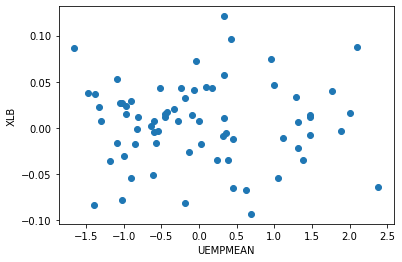

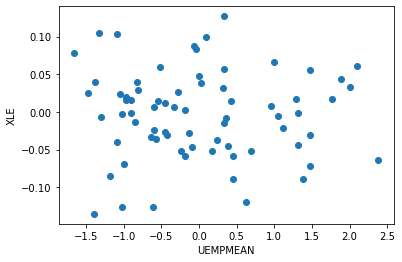

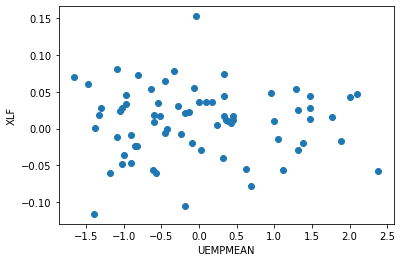

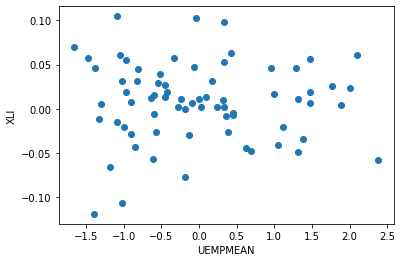

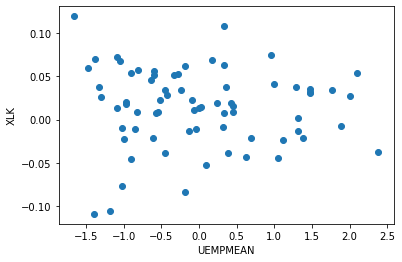

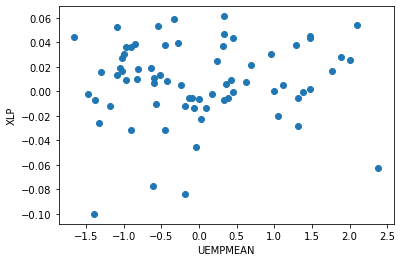

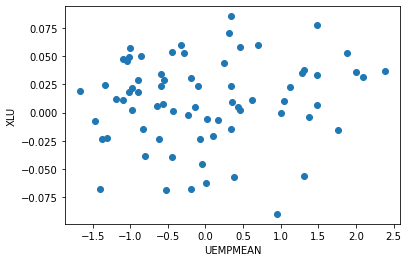

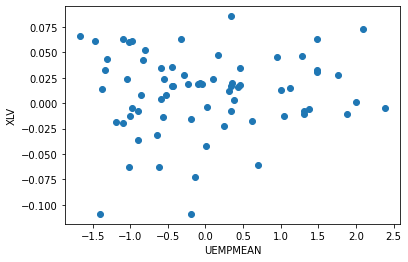

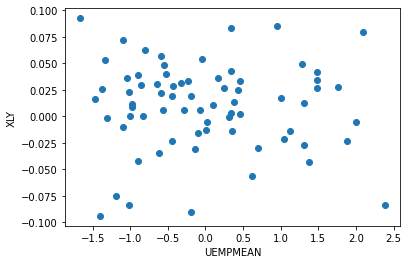

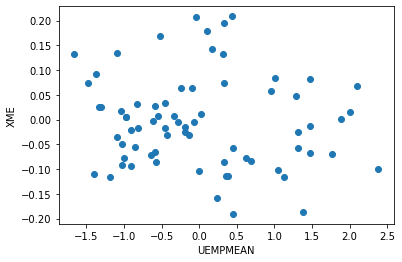

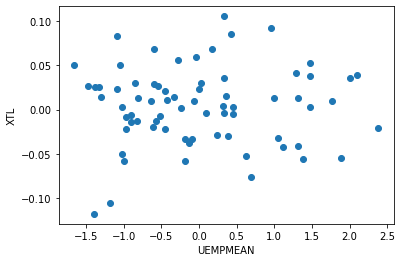

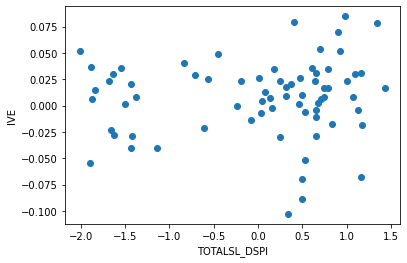

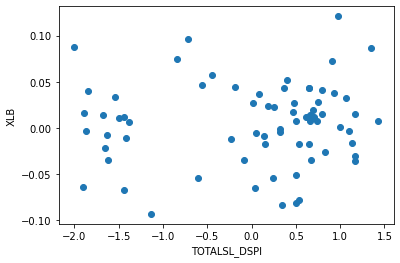

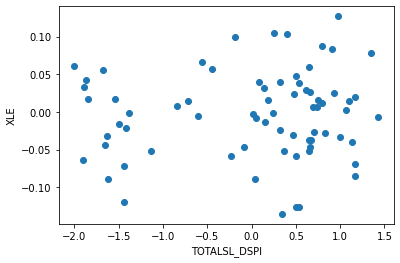

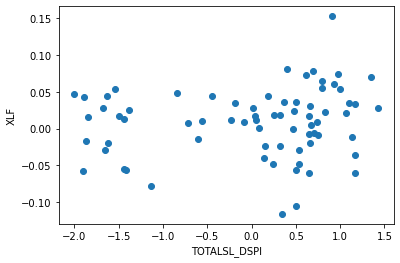

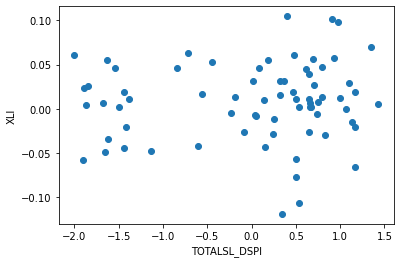

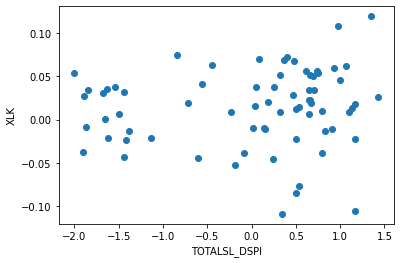

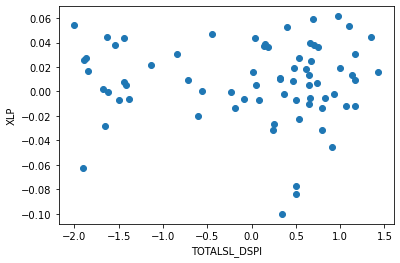

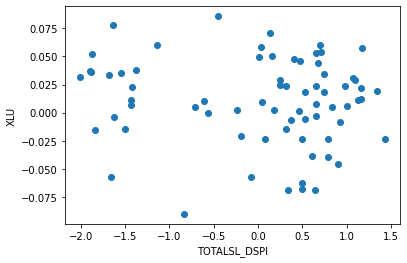

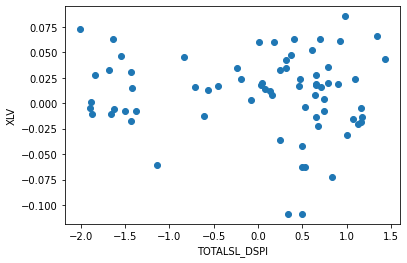

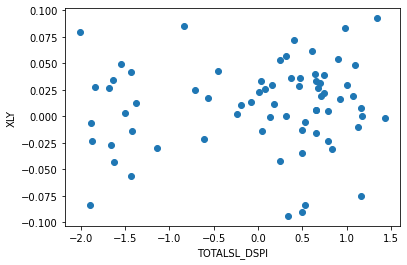

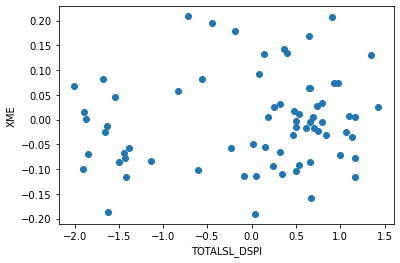

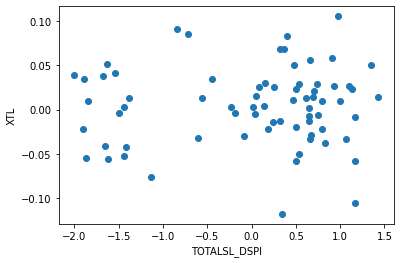

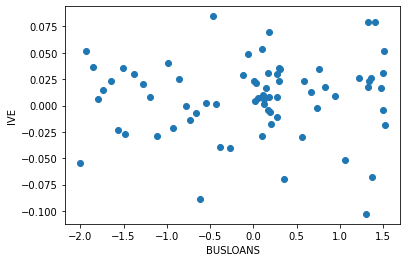

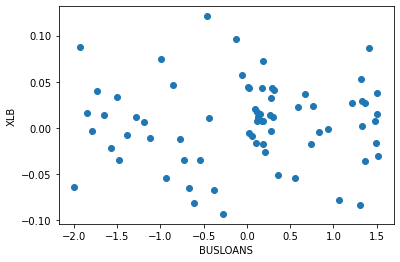

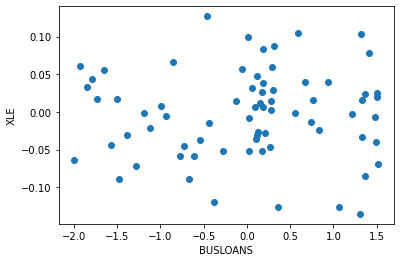

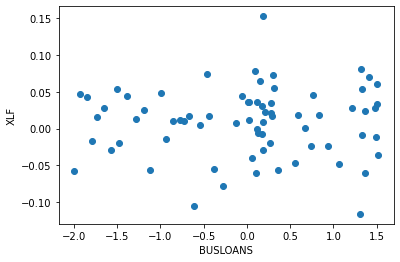

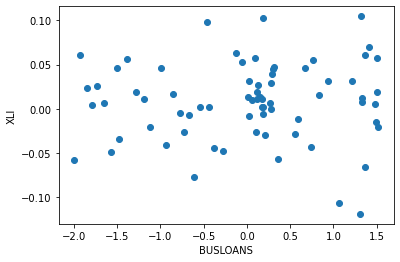

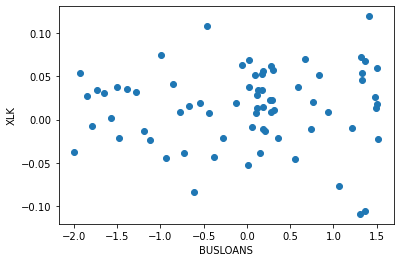

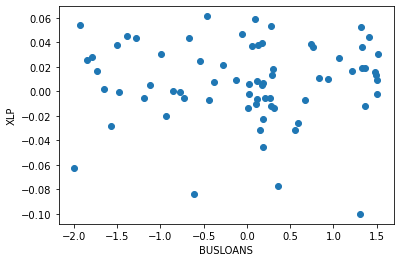

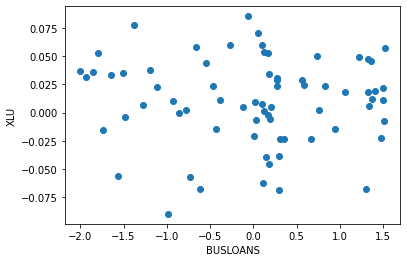

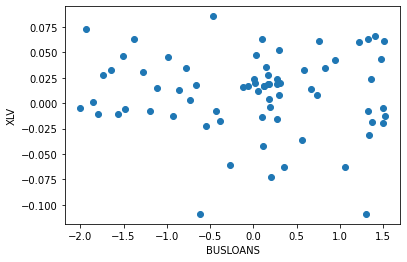

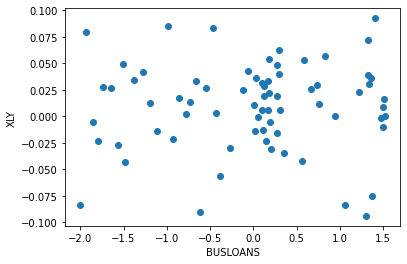

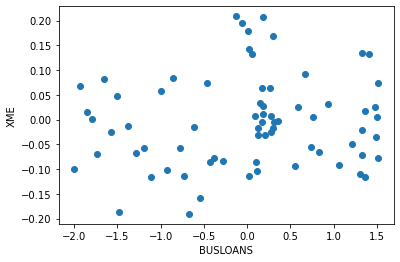

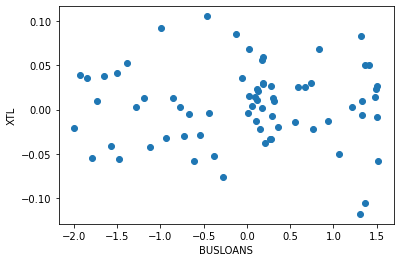

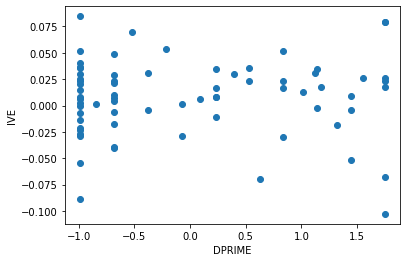

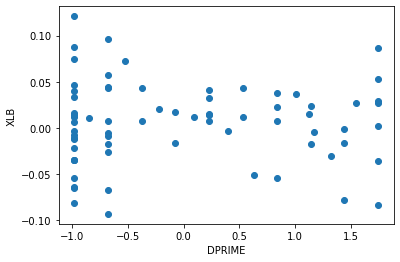

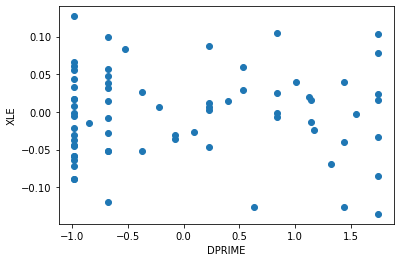

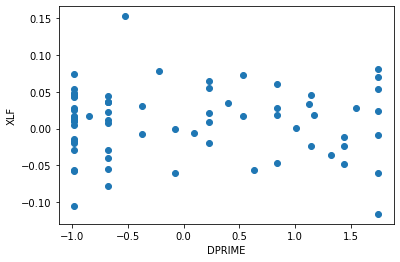

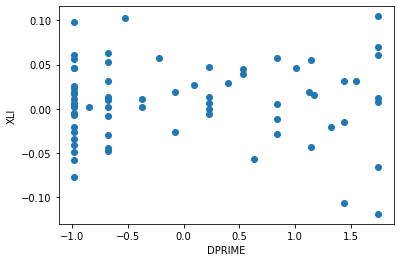

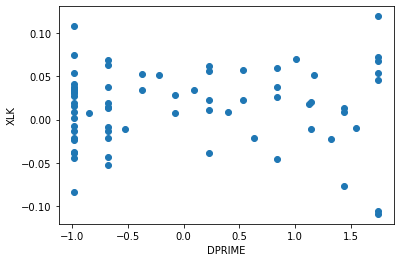

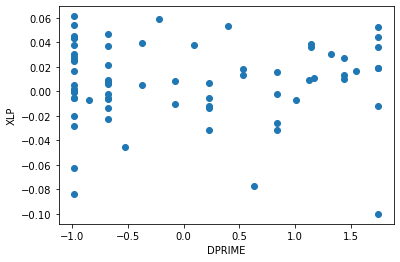

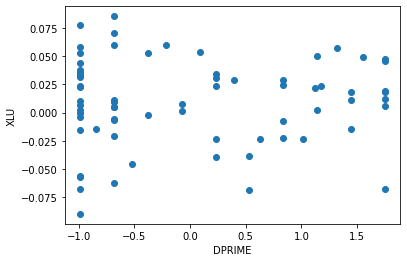

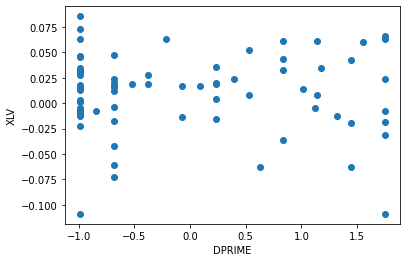

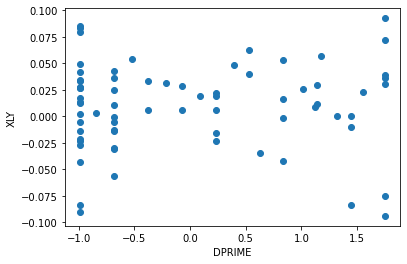

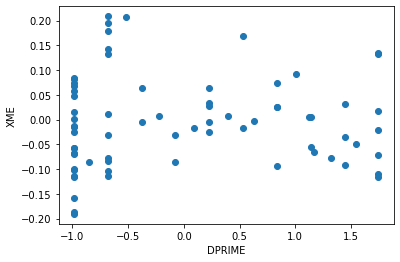

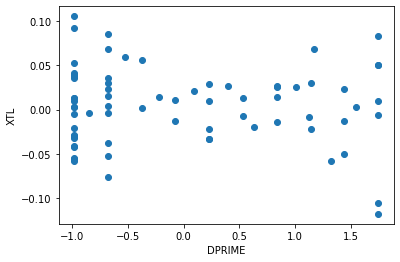

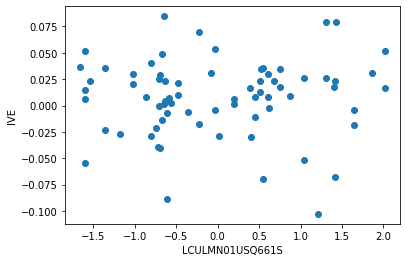

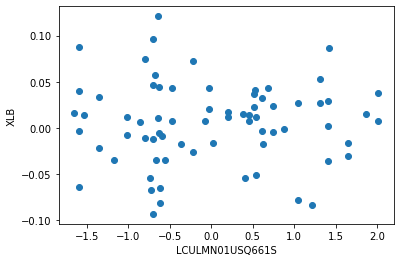

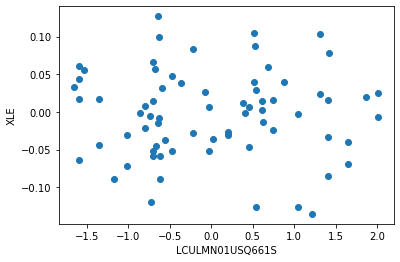

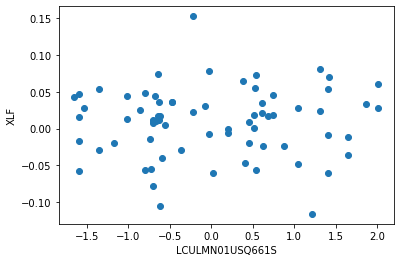

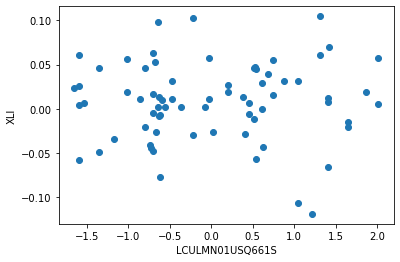

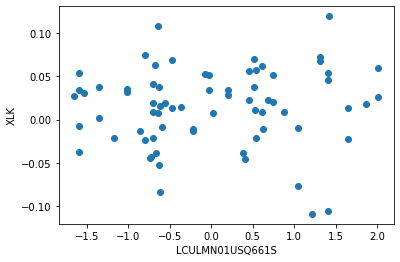

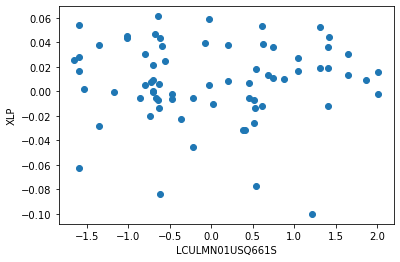

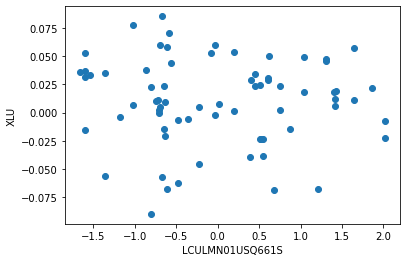

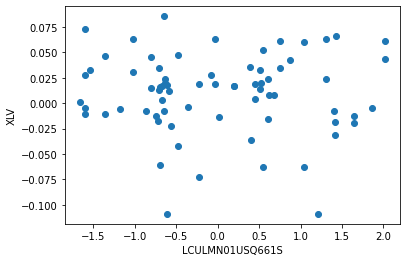

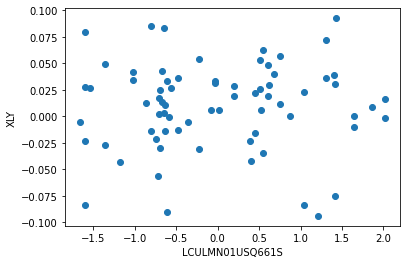

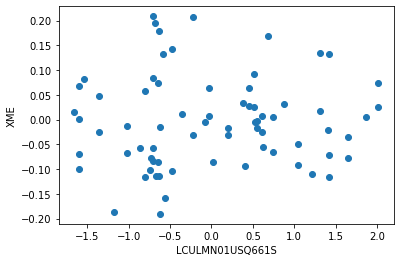

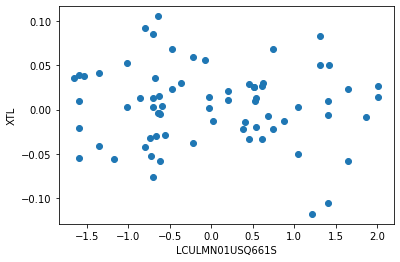

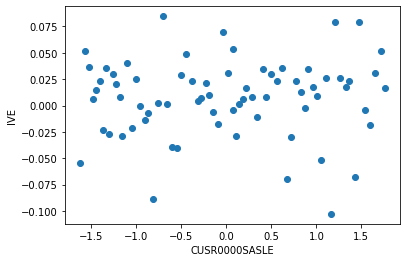

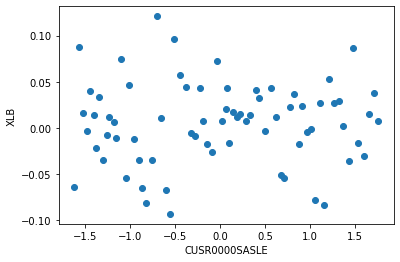

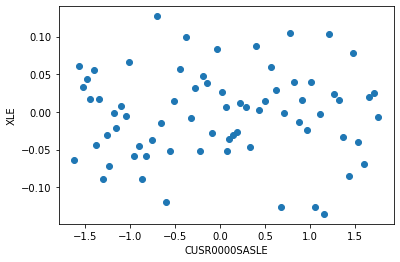

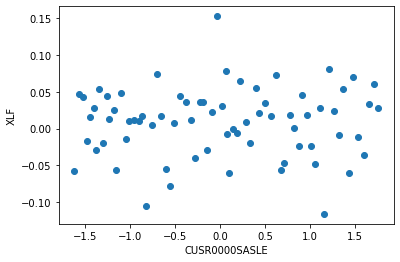

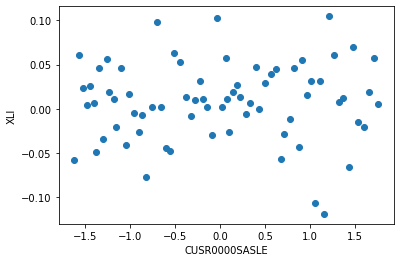

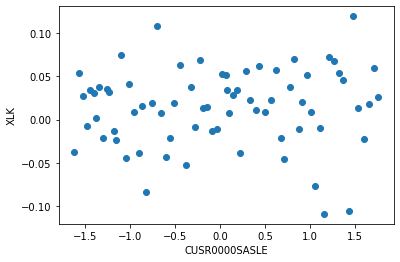

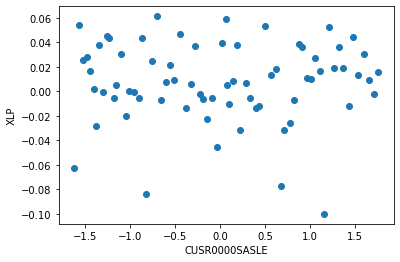

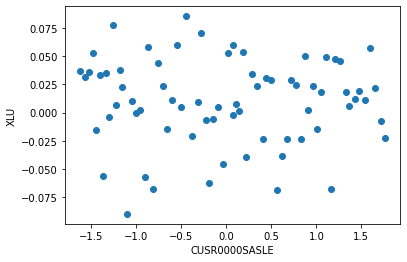

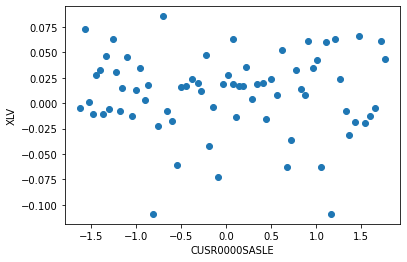

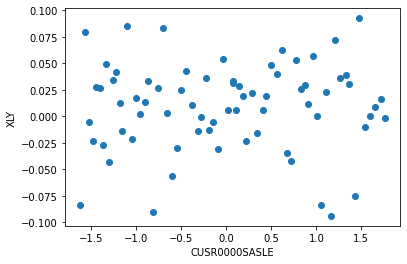

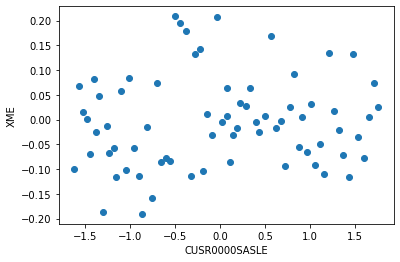

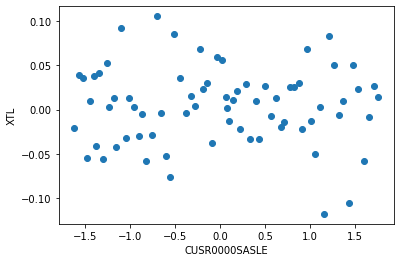

In [ ]:
eco_col=normalized_df_LEI_CEI_LAC.columns
etf_col=df_month_log_rets.columns

for i in eco_col:
  for j in etf_col:
    plt.scatter(normalized_df_LEI_CEI_LAC[i], df_month_log_rets[j])
    plt.xlabel(i)
    plt.ylabel(j)
    plt.show()

## 3) Category 1 Models: Linear Regression

Make sure to use the normalized dataframe: normalized_df_LEI_CEI_LAC

In [ ]:
etf_return = df_month_log_rets.iloc[:,0:1]
etf_return.head()

,IVE
Date,
2014-02-01,-0.054080
2014-03-01,0.051953
2014-04-01,0.036897
2014-05-01,0.006513
2014-06-01,0.014359


### 3.1) For each ETF (there's 11 in total!), run a regression modeling the ETF returns on the 10 Leading EI (LEI) factors.  This will give a total of 11 regression models.  Be sure to use the weights located in the link above.

In [ ]:
normalized_df_lei = normalized_df_LEI_CEI_LAC.iloc[:, 0:10]
normalized_df_lei.head()

,CEU3000000002,IC4WSA,NEWORDER,ISM_MAN_NEWORDERS,DGORDER,PERMIT1,SP500,USSLIND,T10YFF,UMCSENT
Date,,,,,,,,,,
2014-02-01,-1.096996,2.400941,1.267077,-0.446621,-0.127309,-1.873477,-1.464292,-0.543211,1.599932,-2.241472
2014-03-01,0.757450,2.159771,1.744440,-0.341214,0.220923,-1.713628,-1.341759,-0.206740,1.602658,-2.542633
2014-04-01,0.015671,1.965919,0.935831,-0.341214,0.246296,-1.747881,-1.339809,1.055027,1.566337,-1.770909
2014-05-01,0.757450,2.001026,0.690340,-0.024991,-0.180833,-1.667957,-1.272587,1.307380,1.387110,-2.185005
2014-06-01,1.499228,1.801832,2.088568,0.326368,0.550909,-1.416766,-1.121504,1.727969,1.425814,-2.072069


In [ ]:
def get_linear_regression_score(factors, returns):
    scores = []
    for col in returns.columns:
        X = factors.values
        y = returns[col].values
        reg = LinearRegression().fit(X, y)
        scores.append(reg.score(X, y))

    return scores

In [ ]:
normalized_lr_lei_scores = get_linear_regression_score(normalized_df_lei, df_month_log_rets)
pd.DataFrame({'LR (with lei)': df_month_log_rets.columns.values, 'Scores': normalized_lr_lei_scores})

,LR (with lei),Scores
0,IVE,0.138785
1,XLB,0.110673
2,XLE,0.092656
3,XLF,0.207483
4,XLI,0.132953
5,XLK,0.116248
6,XLP,0.096105
7,XLU,0.066244
8,XLV,0.192244
9,XLY,0.118306


In [ ]:
etf_normalized_lr_lei_scores = get_linear_regression_score(normalized_df_lei, etf_return)
pd.DataFrame({'LR (with lei)': etf_return.columns.values, 'Scores': etf_normalized_lr_lei_scores})

,LR (with lei),Scores
0,IVE,0.138785


### 3.2) Repeat the regression modeling, but this time use the 7 Lagging EI factors (LAG).  This will give another 11 regression models.

In [ ]:
normalized_df_lag = normalized_df_LEI_CEI_LAC.iloc[0:71 , 14:21]
normalized_df_lag.head()

,MNFCTRIRSA,UEMPMEAN,TOTALSL_DSPI,BUSLOANS,DPRIME,LCULMN01USQ661S,CUSR0000SASLE
Date,,,,,,,
2014-02-01,-2.108508,2.382294,-1.899943,-1.999485,-0.985455,-1.596592,-1.620308
2014-03-01,-1.903152,2.096700,-2.006497,-1.932630,-0.985455,-1.596592,-1.569198
2014-04-01,-1.903152,2.001502,-1.890785,-1.853811,-0.985455,-1.658169,-1.523356
2014-05-01,-1.697797,1.882505,-1.869901,-1.794485,-0.985455,-1.597177,-1.474354
2014-06-01,-1.697797,1.763507,-1.843700,-1.732260,-0.985455,-1.597177,-1.443727


In [ ]:
normalized_lr_lag_scores = get_linear_regression_score(normalized_df_lag, df_month_log_rets)
pd.DataFrame({'LR (with lag)': df_month_log_rets.columns.values, 'Scores': normalized_lr_lag_scores})

,LR (with lag),Scores
0,IVE,0.059800
1,XLB,0.038493
2,XLE,0.077628
3,XLF,0.101683
4,XLI,0.050342
5,XLK,0.055015
6,XLP,0.049820
7,XLU,0.118639
8,XLV,0.057181
9,XLY,0.028242


In [ ]:
etf_normalized_lr_lag_scores = get_linear_regression_score(normalized_df_lag, etf_return)
pd.DataFrame({'LR (with lag)': etf_return.columns.values, 'Scores': etf_normalized_lr_lag_scores})

,LR (with lag),Scores
0,IVE,0.0598


### 3.3) Repeat the regression modeling, but this time use the 4 Coincidental EI factors (CEI).  This will give another 11 regression models

In [ ]:
normalized_df_cei = normalized_df_LEI_CEI_LAC.iloc[: , 10:14]
normalized_df_cei.head()

,PAYEMS,W875RX1,INDPRO,CMRMTSPL
Date,,,,
2014-02-01,-1.866136,-1.916923,-0.258940,-1.944472
2014-03-01,-1.804072,-1.815766,0.293402,-1.709360
2014-04-01,-1.724659,-1.763314,0.324480,-1.666250
2014-05-01,-1.671392,-1.717866,0.547791,-1.583995
2014-06-01,-1.591735,-1.637071,0.738009,-1.595626


In [ ]:
normalized_lr_cei_scores = get_linear_regression_score(normalized_df_cei, df_month_log_rets)
pd.DataFrame({'LR (with cei)': df_month_log_rets.columns.values, 'Scores': normalized_lr_cei_scores})

,LR (with cei),Scores
0,IVE,0.011110
1,XLB,0.026616
2,XLE,0.059902
3,XLF,0.028084
4,XLI,0.015153
5,XLK,0.013300
6,XLP,0.024333
7,XLU,0.019789
8,XLV,0.012208
9,XLY,0.011246


In [ ]:
etf_normalized_lr_cei_scores = get_linear_regression_score(normalized_df_cei, etf_return)
pd.DataFrame({'LR (with cei)': etf_return.columns.values, 'Scores': etf_normalized_lr_cei_scores})

,LR (with cei),Scores
0,IVE,0.01111


### 3.4) Repeat the regression one more time, using all 21 EI factors: LEI, LAG, and CEI.  This will give another 11 regression models.

In [ ]:
normalized_lr_cei_lag_lei_scores = get_linear_regression_score(normalized_df_LEI_CEI_LAC, df_month_log_rets)
pd.DataFrame({'LR (with cei,lag,lei)': df_month_log_rets.columns.values, 'Scores': normalized_lr_cei_lag_lei_scores})

,"LR (with cei,lag,lei)",Scores
0,IVE,0.387359
1,XLB,0.437250
2,XLE,0.403652
3,XLF,0.379788
4,XLI,0.367639
5,XLK,0.343847
6,XLP,0.317549
7,XLU,0.257407
8,XLV,0.431705
9,XLY,0.391116


In [ ]:
etf_normalized_lr_cei_lag_lei_scores = get_linear_regression_score(normalized_df_LEI_CEI_LAC, etf_return)
pd.DataFrame({'LR (with cei,lag,lei)': etf_return.columns.values, 'Scores': etf_normalized_lr_cei_lag_lei_scores})

,"LR (with cei,lag,lei)",Scores
0,IVE,0.387359


### 3.5) By now, you will have 3 models for XLRE: 1 using LEI, 1 using LAG, 1 using CEI, and 1 using ALL economic indicators.  Similarly, there will be 4 models for each of the other sector ETFs.

We have computed the linear regression using economic indicators. Therefore, we have got a total of four models, namely: 
Model I : Linear regression model of all ETFs using LEI
Model II: Linear regression model of all ETFs using LAG
Model III: Linear regression model of all ETFs using CEI, and
Model IV: Linear regression model of all ETFs using all 21 economic indicators.

### 3.6) Use the model selection paper [Reference Above].  For each sector ETF, compare the results 3.4 with the results from questions 3.1, 3.2, and 3.3

The paper focuses on describing the positive and negative contributors of LEI, LAG and CEI economic indicators in a monthly basis. According to the presented data in the paper, the index for LEI is greater than that of the index of CEI and LAG. In a similar manner, the numerical analysis we have done here shows that the scores of ETFs with LEI is 13.88%, which is greater than that of the scores of CEI (2.35%) and LAG (4.13%). However, the scores of ETFs done with all economic values (38.73%) is greater than that of scores done with LEI, LAG and CEI values.

## 4) Model Selection

### 4.1) For each ETF, which of the sets: LEI, LAG, or CEI, was the best model?

According to the stastistical rules, the regression value is measured with R squared. When we see the scores of ETFs using LEI, LAG, CEI and all economic indicators, the value is under 0.5, which shows that all of the models are not best. However, the LEI model reveals a relatively good result than LAG and CEI. On the other hand, the scores of ETFs done with all 21 economic indicators shows a better result than the rest of models.   

## 5) Category 2 Models: LASSO

### 5.1) For each sector ETF, run a LASSO regression with all 21 economic indicators.   

In [ ]:
ETF_names=df_month_log_rets.columns
X=normalized_df_LEI_CEI_LAC

ETF_names

Index(['IVE', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY',
       'XME', 'XTL'],
      dtype='object')

In [ ]:
#Function optimal alpha fro LASSO regression
def opt_r(X,Y):
  from numpy import arange
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RepeatedKFold
  from sklearn.linear_model import Lasso
  # define model
  model = Lasso()
  # define model evaluation method
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=23)
  # define grid
  grid = dict()
  grid['alpha'] = arange(0, 1, 0.01)
  # define search
  search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  # perform the search
  results = search.fit(X, Y)
  r=results.best_params_.get('alpha')
  # summarize
  print('MAE: %.3f' % results.best_score_)
  print('Config: %s' % results.best_params_)
  return (r)

In [ ]:
ETF_names=df_month_log_rets.columns
X=normalized_df_LEI_CEI_LAC

for i in ETF_names:
  #Dynamic response variable
  Y=df_month_log_rets[i].to_frame()

  #Split of the 
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=(1/5))

  r=opt_r(X,Y)
  lasso = linear_model.Lasso(alpha = r)
  lasso.fit(X,Y)
  lasso_coeff = lasso.coef_

  print('ETF results:',i)
  print("")
  #R^2 using the train set:
  print("R^2 using the train set:")
  print(lasso.score(X,Y))
  print("")

  y_pred= lasso.predict(X)
  #R^2 using the test set:
  print("R^2 using the test set:")
  print(r2_score(y_pred, Y))
  print("")

  # Feature coefficients:
  print("Feature coefficients:")
  print(lasso_coeff)
  print("")
  print("--------------------------")


MAE: -0.028
Config: {'alpha': 0.01}
ETF results: IVE

R^2 using the train set:
0.0

R^2 using the test set:
0.0

Feature coefficients:
[ 0. -0. -0.  0.  0.  0.  0.  0. -0.  0.  0.  0. -0.  0.  0. -0.  0.  0.
  0.  0.  0.]

--------------------------
MAE: -0.034
Config: {'alpha': 0.02}
ETF results: XLB

R^2 using the train set:
0.0

R^2 using the test set:
-6.368246502711913e+32

Feature coefficients:
[ 0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.]

--------------------------
MAE: -0.046
Config: {'alpha': 0.02}
ETF results: XLE

R^2 using the train set:
0.0

R^2 using the test set:
-1.7521034777927149e+34

Feature coefficients:
[ 0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0. -0. -0.  0. -0. -0.  0.  0.
 -0. -0.  0.]

--------------------------
MAE: -0.036
Config: {'alpha': 0.02}
ETF results: XLF

R^2 using the train set:
0.0

R^2 using the test set:
-7.08930640559328e+32

Feature coefficients:
[ 0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  

### 5.2) Compare and contrast (with technical details) the results from 5.1 with the results from 3.6.  Did you come up with same conclusion?

From the exploratory analysis from the scatterplots, it can also be see the absence of correlation between the sector ETFs and the economical data. On the one hand, the linear regression when runned against the 21 economical factors presents a $R^2$ of XXXX. The model indicates that proportion of the variance for the 21 economical factors is poorly explained by an independent variable. In that sense, the results obtained with the LASSO regression are concistent given that for each ETF, the model is shrinking the coeeficients to 0. Therefore and most likely, the independent variable is not correlated with the 21 economical factors.

## 6) Category 3 Models: Cluster Analysis

### 6.1) Using daily returns, compute a distance matrix from the correlation or covariance matrix.  Run a cluster analysis using k=3.

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans

#Euclidean distance for the dataframe
euc_dis = euclidean_distances(df.T).round(2)
euc_dis = pd.DataFrame(euc_dis)
euc_dis.columns=df.columns
euc_dis.index = df.columns
euc_dis

,IVE,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XME,XTL
IVE,0.00,1711.29,1455.18,2723.72,1243.19,1505.30,1765.37,1872.95,777.89,342.03,2491.76,1212.02
XLB,1711.29,0.00,509.19,1019.81,488.80,432.54,162.87,239.50,963.28,1558.24,794.45,524.16
XLE,1455.18,509.19,0.00,1424.82,534.01,731.62,595.22,711.43,807.34,1382.23,1133.66,435.27
XLF,2723.72,1019.81,1424.82,0.00,1484.57,1278.30,973.33,863.44,1963.63,2546.34,366.88,1530.09
XLI,1243.19,488.80,534.01,1484.57,0.00,336.83,553.37,645.95,503.75,1075.98,1271.38,195.62
XLK,1505.30,432.54,731.62,1278.30,336.83,0.00,468.88,488.10,770.98,1290.68,1116.21,494.84
XLP,1765.37,162.87,595.22,973.33,553.37,468.88,0.00,154.62,1008.97,1606.41,784.78,586.13
XLU,1872.95,239.50,711.43,863.44,645.95,488.10,154.62,0.00,1114.54,1700.13,695.57,701.54
XLV,777.89,963.28,807.34,1963.63,503.75,770.98,1008.97,1114.54,0.00,628.16,1751.04,492.94
XLY,342.03,1558.24,1382.23,2546.34,1075.98,1290.68,1606.41,1700.13,628.16,0.00,2339.67,1081.98


In [ ]:
#Euclidean distance for the dataframe
euc_dis_log_ret = euclidean_distances(df_log_rets.dropna().T).round(2)
euc_dis_log_ret = pd.DataFrame(euc_dis_log_ret)
euc_dis_log_ret.columns=df_log_rets.columns
euc_dis_log_ret.index = df_log_rets.columns
euc_dis_log_ret

,IVE,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XME,XTL
IVE,0.00,0.21,0.34,0.18,0.16,0.24,0.23,0.38,0.23,0.19,0.58,0.29
XLB,0.21,0.00,0.36,0.29,0.22,0.31,0.34,0.46,0.32,0.28,0.53,0.34
XLE,0.34,0.36,0.00,0.42,0.39,0.45,0.47,0.56,0.46,0.42,0.55,0.45
XLF,0.18,0.29,0.42,0.00,0.23,0.31,0.35,0.49,0.31,0.27,0.62,0.35
XLI,0.16,0.22,0.39,0.23,0.00,0.26,0.30,0.43,0.28,0.22,0.57,0.31
XLK,0.24,0.31,0.45,0.31,0.26,0.00,0.34,0.46,0.29,0.22,0.63,0.31
XLP,0.23,0.34,0.47,0.35,0.30,0.34,0.00,0.30,0.30,0.28,0.68,0.39
XLU,0.38,0.46,0.56,0.49,0.43,0.46,0.30,0.00,0.42,0.43,0.75,0.49
XLV,0.23,0.32,0.46,0.31,0.28,0.29,0.30,0.42,0.00,0.27,0.66,0.36
XLY,0.19,0.28,0.42,0.27,0.22,0.22,0.28,0.43,0.27,0.00,0.62,0.30


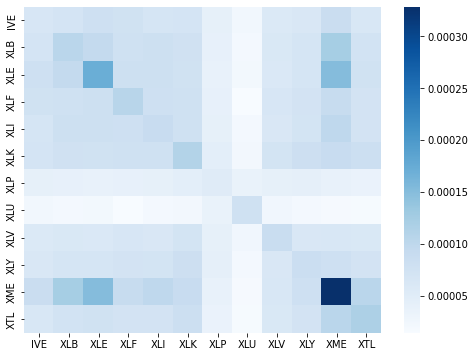

In [ ]:
X = df_log_rets.cov()
plt.figure(figsize=(8,6))
sns.heatmap(X, cmap='Blues')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3).fit(X)
kmeans.score(X)

-2.5031917175856235e-08

In [ ]:
md=[]
k=[]

for i in range (1, 3):
    model = KMeans(n_clusters=i, init='k-means++', random_state=1)
    model.fit(df_log_rets.T)
    score = model.inertia_
    md.append(score)
    k.append(i)

In [ ]:
k_mean_score = np.c_[k, md]
k_mean_score = pd.DataFrame(k_mean_score, columns = ['K','Score'])
sorted_k_mean_score = k_mean_score.sort_values('Score',ascending = False)
sorted_k_mean_score

,K,Score
0,1.0,0.892505
1,2.0,0.590612


### 6.2) Compare and contrast (with technical details) the results from 6.1 with the results from 3.6 and 5.1.  Did you come up with same conclusion?

The result of cluster analysis shows a better scores than the Linear Regression Models (question no. 3.6) and the Lasso Models (presented in question no. 5.1). In other words, K_mean_score obtained in cluster analysis is 89.25%, which is greater than Linear regression model's score (38.73%) and the Lasso's score (

## 7) Category 4 Models: Tree

### 7.1) For each ETF, run a regression tree using all 21 economic indicators.

ETF: IVE
         1         2         3   ...        10        8        9 
0  0.040277  0.044989  0.046561  ...  0.056219  0.056303  0.05635

[1 rows x 10 columns]
-----------------------------------------
ETF: XLB
          2         1        3         5  ...         6         7        8         9
0  0.043668  0.045149  0.04596  0.047459  ...  0.048651  0.048671  0.04924  0.049635

[1 rows x 10 columns]
-----------------------------------------
ETF: XLE
          1         4         2         3  ...         7        6        8         9
0  0.059126  0.059544  0.060413  0.060584  ...  0.071574  0.07327  0.07334  0.073623

[1 rows x 10 columns]
-----------------------------------------
ETF: XLF
         2         1         4   ...        9         8         10
0  0.050451  0.051915  0.053305  ...  0.058528  0.058802  0.059428

[1 rows x 10 columns]
-----------------------------------------
ETF: XLI
        1         2         3         4   ...        10      7         5         9 
0  0.

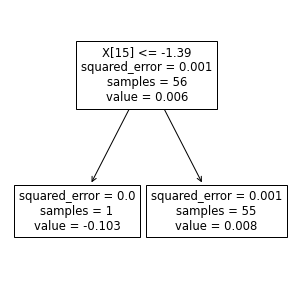

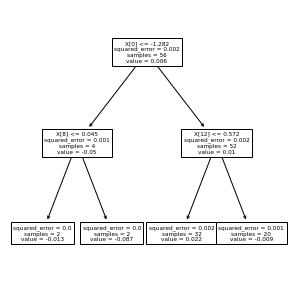

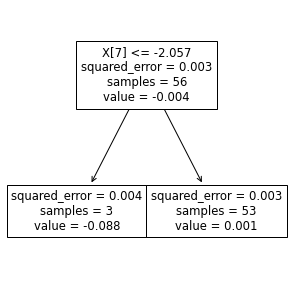

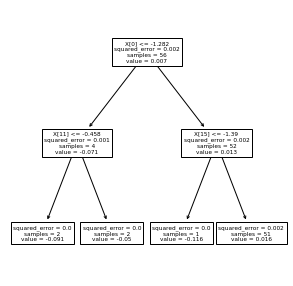

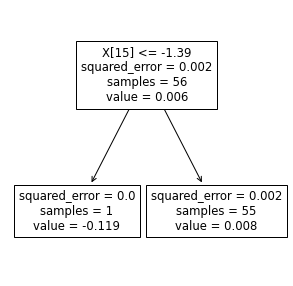

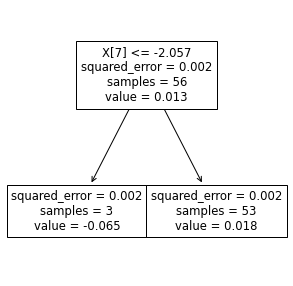

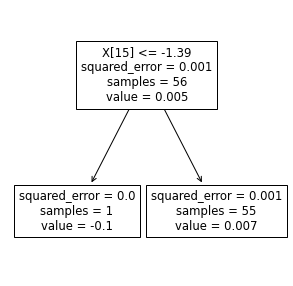

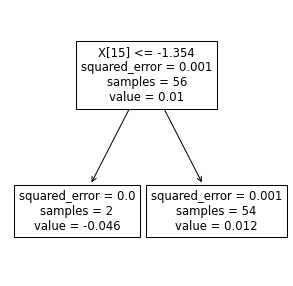

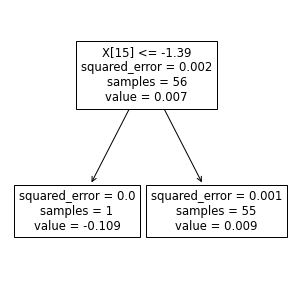

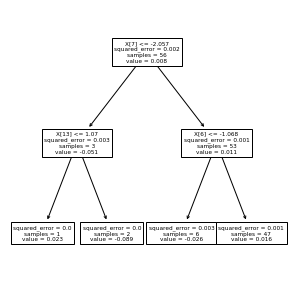

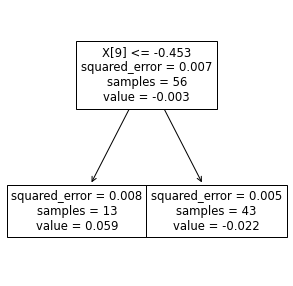

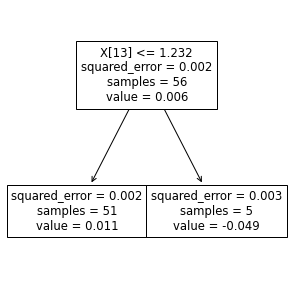

In [ ]:
reg_scores = pd.DataFrame(columns=list(range(1, 11)))
reg_scores.index.name = 'Max Depth'

ETF_names=df_month_log_rets.columns
X=normalized_df_LEI_CEI_LAC

for z in ETF_names:
  Y=df_month_log_rets[z].to_frame()
  for i in range(1, 6):
    for j in range(1, 11):
      X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
      reg_tree = DecisionTreeRegressor(max_depth=j, min_samples_split=2, min_samples_leaf=1, random_state=i)
      reg_tree.fit(X_train, y_train)
      reg_y_pred = reg_tree.predict(X_test)
      rmse = mean_squared_error(y_test, reg_y_pred) ** 0.5
      reg_scores.loc[i, j] = rmse
  print("ETF:",z)
  #print(reg_scores.transpose())
  reg_scores_mean = pd.DataFrame(reg_scores.mean(axis=0)).sort_values(0, ascending=True)
  print(reg_scores_mean.transpose())

  from sklearn import tree
  from sklearn.tree import export_graphviz 

  #Optimal depth
  m_depth=reg_scores_mean.transpose().columns[0]

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=23)
  reg_tree = DecisionTreeRegressor(max_depth=m_depth, min_samples_split=2, min_samples_leaf=1, random_state=23)
  reg_tree.fit(X_train, y_train)

  plt.figure(figsize=(5,5))
  tree.plot_tree(reg_tree)
  print("-----------------------------------------")

### 7.2) Compare and contrast (with technical details) the results from 7.1 with the results from 3.4, 5.1, and 6.1.  Did you come up with same conclusion?

We used cross validation to determine the optimal depth of each ETF regression tree, given the lowest RMSE. 

## 8) Interpeting the Models

### 8.1) You have now found a set of sectors that regress best on Leading Indicators.  What do these sectors have in common?

Average weekly hours, manufacturing

2- Average weekly initial claims for unemployment insurance

3- Manufacturers’ new orders, consumer goods and materials

4- Vendor performance, slower deliveries diffusion index (ISM new order index)

5- Manufacturers’ new orders, non-defense capital goods

6- Building permits, new private housing units

7- Stock prices, 500 common stocks

8- Money supply, M2

9- Interest rate spread, 10-year Treasury bonds less Federal funds (%)

10- Index of consumer expectations

### 8.2) Similarly, you have found a set of sectors that regress best on Coincidental indicators.  What do these sectors have in common?

- Average duration of unemployment

2- Inventories to sales ratio, manufacturing and trade

3- Change in labor cost per unit of output, manufacturing (%)

4- Average prime rate charged by banks (%)

5- Commercial and industrial loans outstanding

6- Consumer installment credit outstanding to personal income ratio

7- Change in consumer price index for services (%)

### 8.3) Similarly, you have found a set of sectors that regress best on lagging.  What do these sectors have in common?